In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

C:\Users\joiakim\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
data_file = open("mnist_train.csv", "r")
datalist = data_file.readlines()
data_file.close()

In [14]:
len(datalist)

60001

In [15]:
datalist[1]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [16]:
class Neuralnetwork():
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lrate = learningrate
        # weights are represented in matrix forms, using a normal distribution for intial weights
        self.wi_h = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes)) # weights from input to hidden nodes
        self.wh_o = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes)) # weights from hidden to output nodes
        # sigmoid function for activation
        self.activation_function = lambda x: sp.expit(x) 
        pass
    
    
    def train(self, input_list, target_list):
        inputs= np.array(input_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T
        
        #calculate signals into nodes and apply sigmoid function
        hidden_inputs = np.dot(self.wi_h, inputs) # 100 * 1
        hidden_outputs = self.activation_function(hidden_inputs) #100 * 1
        
        #calculate signals into nodes and apply function
        current_output = np.dot(self.wh_o, hidden_outputs) # 10 * 1
        final_output = self.activation_function(current_output) #10 * 1
        #calculating error and tuning
        o_error = targets-final_output
        hidden_errors = np.dot(self.wh_o.T, o_error) # 100 * 1
        #updating weights
        self.wh_o += self.lrate * np.dot((o_error * final_output*(1.0 -final_output)), np.transpose(hidden_outputs)) #10 * 100
        self.wi_h += self.lrate * np.dot((hidden_errors * hidden_outputs*(1.0 -hidden_outputs)), np.transpose(inputs))
        pass
    
    def query(self, *args):
        # convert input list to 2d array
        t_inputs = np.array(*args, ndmin=2).T
        #calculate signals into nodes and apply sigmoid function
        t_hidden_inputs = np.dot(self.wi_h, t_inputs)
        t_hidden_outputs = self.activation_function(t_hidden_inputs)
        #calculate signals into nodes and apply function
        t_current_output = np.dot(self.wh_o, t_hidden_outputs)
        t_final_output = self.activation_function(t_current_output)
        print(t_final_output)
        return t_final_output
    

In [17]:
inputnodes = 784
hiddennodes = 100
outputnodes = 10
learningrate = 0.3

n = Neuralnetwork(inputnodes, hiddennodes, outputnodes, learningrate)

epochs=1

for e in range(epochs):
    for record in datalist[1:]:
        all_values = record.split(",")
        scaled_input = ((np.asfarray(all_values[1:])/255.0)* 0.99) + 0.01
        targets = np.zeros(outputnodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(scaled_input, targets)
        pass
    pass    

In [18]:
test_data_file = open("mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [19]:
val_t = test_data_list[1].split(",")
print(val_t[0])

7


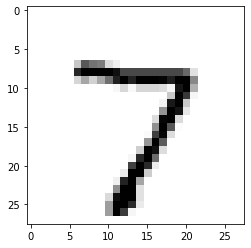

In [20]:
image_array = np.asfarray(val_t[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation="None")

In [21]:
n.query((np.asfarray(val_t[1:])/255 * 0.99) + 0.01)

[[2.16834342e-03]
 [1.86028011e-02]
 [9.42258420e-03]
 [5.04456712e-03]
 [2.42724191e-03]
 [2.85899490e-03]
 [4.70155799e-03]
 [9.98202986e-01]
 [1.10821539e-03]
 [7.88203823e-04]]


array([[2.16834342e-03],
       [1.86028011e-02],
       [9.42258420e-03],
       [5.04456712e-03],
       [2.42724191e-03],
       [2.85899490e-03],
       [4.70155799e-03],
       [9.98202986e-01],
       [1.10821539e-03],
       [7.88203823e-04]])

### scoring neural network

In [22]:
scorecard = []

for record in test_data_list[1:]:
    xval = record.split(",")
    correct_label = int(xval[0])
    print("correct label is", correct_label)
    test_input = ((np.asfarray(xval[1:])/255.0) * 0.99) + 0.01
    test_output = n.query(test_input)
    test_label =  np.argmax(test_output)
    print("neural network label is", test_label)
    if test_label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass


correct label is 7
[[2.16834342e-03]
 [1.86028011e-02]
 [9.42258420e-03]
 [5.04456712e-03]
 [2.42724191e-03]
 [2.85899490e-03]
 [4.70155799e-03]
 [9.98202986e-01]
 [1.10821539e-03]
 [7.88203823e-04]]
neural network label is 7
correct label is 2
[[3.17000984e-02]
 [2.33820147e-03]
 [9.98370153e-01]
 [2.59452833e-03]
 [4.94722348e-05]
 [1.52003415e-04]
 [8.88475873e-04]
 [1.48216929e-03]
 [3.79136067e-05]
 [1.39137415e-04]]
neural network label is 2
correct label is 1
[[0.00957521]
 [0.99886225]
 [0.01214653]
 [0.0018279 ]
 [0.02361346]
 [0.00863148]
 [0.01226823]
 [0.00133025]
 [0.0050128 ]
 [0.00474514]]
neural network label is 1
correct label is 0
[[0.99011215]
 [0.00502097]
 [0.00365156]
 [0.00741618]
 [0.00817245]
 [0.00420271]
 [0.00988416]
 [0.0128002 ]
 [0.00727257]
 [0.04823463]]
neural network label is 0
correct label is 4
[[0.00149387]
 [0.00121366]
 [0.00094244]
 [0.00264629]
 [0.9354154 ]
 [0.00595299]
 [0.00187279]
 [0.00779958]
 [0.00127403]
 [0.09478764]]
neural network l

 [3.41202020e-03]]
neural network label is 2
correct label is 0
[[0.99055051]
 [0.00148583]
 [0.00176533]
 [0.00380574]
 [0.00156723]
 [0.0062526 ]
 [0.01154412]
 [0.00779816]
 [0.00116082]
 [0.0017551 ]]
neural network label is 0
correct label is 2
[[0.01813026]
 [0.00367757]
 [0.13087683]
 [0.09560156]
 [0.21226023]
 [0.00879706]
 [0.0158541 ]
 [0.00259823]
 [0.02266725]
 [0.33498005]]
neural network label is 9
correct label is 9
[[0.00140566]
 [0.00151546]
 [0.0052199 ]
 [0.00789248]
 [0.13044187]
 [0.0129892 ]
 [0.00480468]
 [0.01470327]
 [0.00400779]
 [0.88540668]]
neural network label is 9
correct label is 9
[[0.0652079 ]
 [0.02226281]
 [0.06820485]
 [0.09955257]
 [0.00471944]
 [0.01491486]
 [0.00911182]
 [0.00882612]
 [0.26118677]
 [0.33179883]]
neural network label is 9
correct label is 5
[[3.37258510e-02]
 [2.22087295e-02]
 [2.03523717e-03]
 [8.00183987e-04]
 [3.59791398e-02]
 [9.34989476e-01]
 [8.43374241e-03]
 [2.07817946e-03]
 [3.28381369e-02]
 [4.10234136e-02]]
neural netw

[[4.43971952e-03]
 [4.59480334e-03]
 [9.56304235e-01]
 [1.18450358e-01]
 [6.75972329e-04]
 [6.93895983e-04]
 [8.49876941e-05]
 [3.22592180e-03]
 [7.01073885e-04]
 [9.98534903e-04]]
neural network label is 2
correct label is 9
[[2.61219604e-03]
 [5.64814348e-04]
 [4.09650872e-03]
 [7.99493686e-03]
 [7.58294698e-03]
 [1.71465693e-03]
 [6.47101686e-03]
 [1.96543305e-02]
 [6.24876471e-03]
 [9.78133823e-01]]
neural network label is 9
correct label is 2
[[0.00939729]
 [0.07169278]
 [0.94564851]
 [0.09683317]
 [0.00683193]
 [0.09589736]
 [0.03081813]
 [0.09362977]
 [0.04952069]
 [0.01476115]]
neural network label is 2
correct label is 0
[[0.9913086 ]
 [0.00546789]
 [0.00271743]
 [0.01313046]
 [0.00909688]
 [0.02704718]
 [0.00265809]
 [0.01084655]
 [0.0013034 ]
 [0.01668775]]
neural network label is 0
correct label is 4
[[0.00352263]
 [0.00172578]
 [0.00232418]
 [0.00308613]
 [0.9526481 ]
 [0.02271895]
 [0.00421669]
 [0.0091062 ]
 [0.00269438]
 [0.10387702]]
neural network label is 4
correct l

[[0.00259283]
 [0.00492217]
 [0.02408784]
 [0.00157702]
 [0.00127389]
 [0.00824822]
 [0.00434826]
 [0.94858715]
 [0.01237373]
 [0.01666736]]
neural network label is 7
correct label is 9
[[4.77423478e-04]
 [5.96072813e-04]
 [8.00776046e-03]
 [7.63657813e-03]
 [4.12582957e-02]
 [3.88953611e-03]
 [1.59968116e-03]
 [8.38406072e-03]
 [6.80711317e-04]
 [9.62674589e-01]]
neural network label is 9
correct label is 7
[[0.00208394]
 [0.00723556]
 [0.02177389]
 [0.00153654]
 [0.00287705]
 [0.00508844]
 [0.00338738]
 [0.96611873]
 [0.00938613]
 [0.00518117]]
neural network label is 7
correct label is 1
[[0.00558699]
 [0.99301212]
 [0.00930839]
 [0.00898508]
 [0.04406055]
 [0.01132702]
 [0.04360509]
 [0.00118781]
 [0.02311445]
 [0.0215449 ]]
neural network label is 1
correct label is 9
[[0.00563321]
 [0.00243489]
 [0.0023636 ]
 [0.00295102]
 [0.08581047]
 [0.00942441]
 [0.00451902]
 [0.02004796]
 [0.0074388 ]
 [0.98876134]]
neural network label is 9
correct label is 2
[[6.05194989e-03]
 [2.11064682

[[3.79305000e-03]
 [2.74488563e-05]
 [5.72451124e-03]
 [4.33838279e-03]
 [1.85431539e-03]
 [5.78412799e-04]
 [1.36438307e-03]
 [2.11758573e-02]
 [2.33855801e-03]
 [9.76680579e-01]]
neural network label is 9
correct label is 1
[[0.0073736 ]
 [0.99783716]
 [0.01525152]
 [0.00226229]
 [0.02280008]
 [0.00652092]
 [0.00997187]
 [0.00142011]
 [0.00551302]
 [0.00473341]]
neural network label is 1
correct label is 0
[[9.24572098e-01]
 [1.78754322e-03]
 [5.96791509e-04]
 [3.34767782e-04]
 [4.65804381e-04]
 [1.55052021e-04]
 [3.60562019e-01]
 [8.48581798e-04]
 [8.42011999e-05]
 [4.70147342e-04]]
neural network label is 0
correct label is 5
[[0.0019082 ]
 [0.00243534]
 [0.00314051]
 [0.00745163]
 [0.02223462]
 [0.98993224]
 [0.00226903]
 [0.00198928]
 [0.00179768]
 [0.02891862]]
neural network label is 5
correct label is 2
[[8.96888094e-03]
 [8.67660410e-03]
 [4.09172423e-01]
 [1.57235442e-01]
 [1.30828722e-03]
 [5.31361400e-03]
 [3.28257332e-04]
 [1.36923302e-02]
 [2.76243252e-02]
 [2.98977387e-

[[5.43766042e-04]
 [1.52450867e-03]
 [4.39821266e-04]
 [5.05736794e-02]
 [2.48282180e-03]
 [2.14621020e-04]
 [7.22301964e-04]
 [5.33122999e-01]
 [1.33757031e-02]
 [1.90244611e-01]]
neural network label is 7
correct label is 8
[[0.01696207]
 [0.00424182]
 [0.01141279]
 [0.29656747]
 [0.02242047]
 [0.00766644]
 [0.00835747]
 [0.00326493]
 [0.72129668]
 [0.015962  ]]
neural network label is 8
correct label is 6
[[0.0012267 ]
 [0.00179474]
 [0.08044346]
 [0.01458328]
 [0.00432699]
 [0.0029676 ]
 [0.97621455]
 [0.00116952]
 [0.00877288]
 [0.00274002]]
neural network label is 6
correct label is 0
[[0.97208087]
 [0.00698469]
 [0.00115208]
 [0.00348844]
 [0.00421424]
 [0.00142068]
 [0.00512229]
 [0.00891874]
 [0.0019582 ]
 [0.00580713]]
neural network label is 0
correct label is 2
[[6.44189310e-03]
 [3.96226510e-03]
 [9.96566313e-01]
 [6.58553586e-03]
 [9.44654593e-04]
 [2.14228868e-03]
 [2.10760991e-04]
 [1.06292594e-02]
 [5.48080190e-03]
 [8.79596657e-04]]
neural network label is 2
correct l

 [0.00470789]]
neural network label is 5
correct label is 1
[[0.00561375]
 [0.98990123]
 [0.00922499]
 [0.00244492]
 [0.02275932]
 [0.00168934]
 [0.00179551]
 [0.00381101]
 [0.00500433]
 [0.00616828]]
neural network label is 1
correct label is 1
[[0.00423281]
 [0.99489248]
 [0.00503807]
 [0.01400039]
 [0.04741988]
 [0.0054971 ]
 [0.06120541]
 [0.00148539]
 [0.0149937 ]
 [0.01985123]]
neural network label is 1
correct label is 6
[[1.04779344e-03]
 [4.85423482e-04]
 [7.42182342e-04]
 [4.54583317e-04]
 [2.16422014e-03]
 [4.37862913e-02]
 [9.94722123e-01]
 [3.16846399e-04]
 [3.18041785e-03]
 [1.44087672e-03]]
neural network label is 6
correct label is 4
[[0.00098173]
 [0.00097843]
 [0.00401295]
 [0.00213843]
 [0.97682468]
 [0.00307022]
 [0.00397377]
 [0.00398931]
 [0.00100162]
 [0.02284571]]
neural network label is 4
correct label is 7
[[0.00871282]
 [0.02520134]
 [0.01271075]
 [0.00682072]
 [0.00748188]
 [0.0070536 ]
 [0.03187545]
 [0.8001972 ]
 [0.01529107]
 [0.08277358]]
neural network 

neural network label is 7
correct label is 3
[[7.91625093e-04]
 [2.13287382e-03]
 [9.42385370e-04]
 [9.97738356e-01]
 [1.54868358e-03]
 [1.30989443e-03]
 [1.77042610e-04]
 [8.43497461e-04]
 [4.30611039e-03]
 [3.01381237e-03]]
neural network label is 3
correct label is 9
[[2.94385350e-04]
 [1.35520908e-03]
 [1.98290891e-03]
 [2.15454882e-03]
 [5.15863160e-02]
 [9.52182228e-03]
 [3.10508708e-03]
 [2.83572396e-03]
 [4.09262036e-04]
 [9.91094603e-01]]
neural network label is 9
correct label is 8
[[0.01996243]
 [0.02248144]
 [0.0021097 ]
 [0.01189712]
 [0.0092756 ]
 [0.01063008]
 [0.00978575]
 [0.00154711]
 [0.98969765]
 [0.00234628]]
neural network label is 8
correct label is 8
[[0.01762143]
 [0.03201313]
 [0.0188403 ]
 [0.04470255]
 [0.03200531]
 [0.0605115 ]
 [0.06538113]
 [0.0068042 ]
 [0.89662003]
 [0.02968963]]
neural network label is 8
correct label is 4
[[4.68839426e-04]
 [2.52219717e-04]
 [1.22650685e-02]
 [3.03961073e-04]
 [9.72730145e-01]
 [1.68233383e-03]
 [8.16889549e-03]
 [4.7

neural network label is 3
correct label is 8
[[0.00392143]
 [0.01161781]
 [0.00183323]
 [0.04346943]
 [0.00323334]
 [0.01104325]
 [0.00261189]
 [0.00683146]
 [0.90124293]
 [0.01584173]]
neural network label is 8
correct label is 1
[[0.00565722]
 [0.98686681]
 [0.01169221]
 [0.00206076]
 [0.01008877]
 [0.00837673]
 [0.00557282]
 [0.00209631]
 [0.00706379]
 [0.00715181]]
neural network label is 1
correct label is 2
[[6.21613763e-05]
 [5.48213707e-04]
 [9.41214973e-01]
 [1.92726621e-03]
 [7.11683106e-04]
 [1.30341935e-03]
 [3.26965070e-03]
 [5.32523918e-03]
 [1.83819558e-04]
 [6.43280432e-02]]
neural network label is 2
correct label is 5
[[0.01618261]
 [0.01827132]
 [0.0418748 ]
 [0.06069596]
 [0.03874446]
 [0.21789033]
 [0.06417564]
 [0.00369764]
 [0.55456928]
 [0.03267529]]
neural network label is 8
correct label is 8
[[0.06083046]
 [0.01651235]
 [0.02126971]
 [0.18157021]
 [0.00413528]
 [0.01435797]
 [0.01789726]
 [0.01124431]
 [0.82341157]
 [0.01660759]]
neural network label is 8
corr

[[3.59397174e-02]
 [1.14918616e-03]
 [1.89186197e-02]
 [4.99202798e-03]
 [6.37936029e-01]
 [5.49553847e-04]
 [7.82851426e-03]
 [1.59461080e-02]
 [8.15977804e-02]
 [3.59597923e-01]]
neural network label is 4
correct label is 7
[[7.26817264e-04]
 [2.28387692e-03]
 [3.04780727e-03]
 [3.26357677e-02]
 [2.22043259e-03]
 [3.52576405e-03]
 [9.57524651e-03]
 [9.10080081e-01]
 [8.97118679e-03]
 [1.39195917e-02]]
neural network label is 7
correct label is 5
[[0.01148468]
 [0.00370313]
 [0.00202506]
 [0.12298364]
 [0.00839136]
 [0.83275093]
 [0.0014049 ]
 [0.00781513]
 [0.0016772 ]
 [0.00466811]]
neural network label is 5
correct label is 4
[[1.22993019e-03]
 [6.54403962e-04]
 [4.25209209e-04]
 [3.99766005e-03]
 [9.87459367e-01]
 [9.26596593e-03]
 [2.39401945e-02]
 [9.22287279e-03]
 [6.15543152e-04]
 [1.65366615e-02]]
neural network label is 4
correct label is 5
[[8.98906523e-04]
 [1.72531304e-02]
 [2.39976217e-04]
 [3.55299660e-02]
 [1.14923673e-03]
 [9.94577984e-01]
 [1.59987485e-04]
 [6.554281

[[0.03311944]
 [0.01288292]
 [0.79276535]
 [0.18681149]
 [0.00741488]
 [0.03129656]
 [0.02345608]
 [0.01526694]
 [0.02207025]
 [0.0232907 ]]
neural network label is 2
correct label is 9
[[2.04052860e-03]
 [2.16022768e-04]
 [1.42710784e-03]
 [6.33717627e-03]
 [1.70007871e-02]
 [3.68579151e-03]
 [3.48513946e-03]
 [2.08643450e-02]
 [3.24451144e-03]
 [9.57592952e-01]]
neural network label is 9
correct label is 1
[[0.01964358]
 [0.99465498]
 [0.00877107]
 [0.00130722]
 [0.01340198]
 [0.00509305]
 [0.00263315]
 [0.00115842]
 [0.01933895]
 [0.00503798]]
neural network label is 1
correct label is 4
[[0.00200143]
 [0.00280505]
 [0.01238964]
 [0.00343373]
 [0.98191901]
 [0.01716059]
 [0.00180677]
 [0.00439103]
 [0.00237148]
 [0.01430981]]
neural network label is 4
correct label is 6
[[2.06928328e-03]
 [1.55253046e-03]
 [2.13916436e-04]
 [2.38153687e-04]
 [3.25385541e-02]
 [4.25054136e-02]
 [9.82456401e-01]
 [3.54090597e-03]
 [1.53621900e-04]
 [3.79814203e-04]]
neural network label is 6
correct l

[[0.00993284]
 [0.01168513]
 [0.01392562]
 [0.00967631]
 [0.01718431]
 [0.00768852]
 [0.0109202 ]
 [0.00180899]
 [0.99082177]
 [0.00372285]]
neural network label is 8
correct label is 6
[[8.57202510e-02]
 [1.31422673e-03]
 [1.25899376e-03]
 [1.44596442e-02]
 [3.79794221e-01]
 [1.30689547e-03]
 [6.47443227e-01]
 [4.32853983e-02]
 [3.59356342e-03]
 [1.58791418e-04]]
neural network label is 6
correct label is 0
[[9.82388314e-01]
 [6.82747180e-03]
 [8.60102612e-04]
 [1.93509746e-03]
 [6.38707279e-03]
 [6.05609850e-04]
 [2.24985482e-02]
 [1.70972739e-02]
 [2.33974244e-03]
 [5.81642027e-03]]
neural network label is 0
correct label is 2
[[2.78640288e-03]
 [4.78685117e-03]
 [5.94538668e-01]
 [6.30698005e-01]
 [2.91521730e-03]
 [3.32613886e-04]
 [5.81854000e-04]
 [9.31513612e-03]
 [6.26422225e-03]
 [6.07772657e-04]]
neural network label is 3
correct label is 5
[[1.51838433e-03]
 [2.11090740e-03]
 [3.26664156e-04]
 [3.18441460e-04]
 [1.06597954e-02]
 [9.83851107e-01]
 [4.47610736e-02]
 [1.749862

[[4.05787539e-03]
 [5.45979516e-03]
 [1.62133233e-02]
 [9.11058794e-03]
 [4.48677717e-04]
 [2.22201076e-03]
 [5.15839014e-03]
 [9.96368462e-01]
 [3.81706345e-04]
 [5.09261405e-03]]
neural network label is 7
correct label is 6
[[6.08279235e-04]
 [2.89726262e-03]
 [3.26428685e-02]
 [1.40043581e-02]
 [1.07231736e-02]
 [5.13943143e-03]
 [9.84595718e-01]
 [5.24509571e-03]
 [3.16082524e-03]
 [2.53150722e-03]]
neural network label is 6
correct label is 6
[[8.86494951e-04]
 [3.04070125e-03]
 [1.40577999e-01]
 [2.03723309e-02]
 [4.14639878e-03]
 [3.66327269e-03]
 [9.83750432e-01]
 [2.31876472e-03]
 [5.47295725e-03]
 [2.85364524e-03]]
neural network label is 6
correct label is 6
[[1.83544879e-02]
 [1.17028453e-02]
 [7.65967699e-04]
 [1.08368707e-03]
 [7.23685626e-03]
 [2.17206865e-01]
 [8.06763417e-01]
 [1.73355027e-03]
 [2.04147458e-01]
 [9.70542861e-03]]
neural network label is 6
correct label is 4
[[1.87038748e-03]
 [9.92537061e-04]
 [5.49584843e-03]
 [1.44330068e-03]
 [9.99430645e-01]
 [1.39

[[0.00115454]
 [0.00115399]
 [0.00331043]
 [0.00653317]
 [0.06042365]
 [0.01110365]
 [0.00341994]
 [0.0153467 ]
 [0.00377187]
 [0.9544824 ]]
neural network label is 9
correct label is 2
[[2.60466774e-03]
 [4.87259265e-02]
 [9.95577014e-01]
 [5.45388105e-02]
 [2.50001963e-04]
 [1.70986562e-03]
 [8.81512508e-04]
 [2.34386652e-03]
 [4.60577224e-03]
 [1.68024957e-03]]
neural network label is 2
correct label is 1
[[0.00159935]
 [0.99563363]
 [0.00480485]
 [0.0295257 ]
 [0.02455739]
 [0.0019257 ]
 [0.02067826]
 [0.0013585 ]
 [0.00676482]
 [0.01005672]]
neural network label is 1
correct label is 2
[[2.42511075e-04]
 [2.14119038e-01]
 [9.87209113e-01]
 [4.97338208e-03]
 [7.30539566e-04]
 [5.93576397e-04]
 [3.10808912e-04]
 [1.12867737e-02]
 [1.09498353e-03]
 [5.67946549e-05]]
neural network label is 2
correct label is 1
[[0.00396898]
 [0.99251457]
 [0.00676152]
 [0.00110402]
 [0.02165896]
 [0.00294481]
 [0.00776112]
 [0.00542267]
 [0.00346428]
 [0.0092072 ]]
neural network label is 1
correct l

[[0.01224037]
 [0.05727283]
 [0.61878788]
 [0.03736522]
 [0.01029885]
 [0.0400178 ]
 [0.15167759]
 [0.08429724]
 [0.26677199]
 [0.00600358]]
neural network label is 2
correct label is 5
[[0.00569131]
 [0.0167075 ]
 [0.00096857]
 [0.35220405]
 [0.00116754]
 [0.96514319]
 [0.0015494 ]
 [0.00382124]
 [0.00360085]
 [0.0162633 ]]
neural network label is 5
correct label is 8
[[0.01427834]
 [0.01833656]
 [0.00330664]
 [0.01491191]
 [0.00847916]
 [0.00801574]
 [0.00995726]
 [0.00152518]
 [0.98796355]
 [0.00241207]]
neural network label is 8
correct label is 0
[[0.95788576]
 [0.01333928]
 [0.00524666]
 [0.00843815]
 [0.00171027]
 [0.00704906]
 [0.02812613]
 [0.00821821]
 [0.00149132]
 [0.19598186]]
neural network label is 0
correct label is 8
[[0.03314807]
 [0.00596529]
 [0.04284056]
 [0.10218854]
 [0.00927544]
 [0.00891627]
 [0.02155589]
 [0.0034088 ]
 [0.93287233]
 [0.02403839]]
neural network label is 8
correct label is 8
[[0.11331419]
 [0.00536076]
 [0.00695899]
 [0.00084433]
 [0.01855101]


[[0.19270994]
 [0.00501112]
 [0.00944914]
 [0.04890889]
 [0.01605867]
 [0.12746016]
 [0.00211119]
 [0.00771613]
 [0.04482978]
 [0.01791546]]
neural network label is 0
correct label is 7
[[3.99512131e-04]
 [3.49661527e-02]
 [2.22065139e-03]
 [2.81624853e-04]
 [6.67220598e-04]
 [2.40571830e-02]
 [7.95001417e-04]
 [9.92782065e-01]
 [4.81364963e-02]
 [2.09123864e-04]]
neural network label is 7
correct label is 4
[[0.0020805 ]
 [0.00231379]
 [0.00510245]
 [0.00524386]
 [0.96280429]
 [0.02046084]
 [0.00417365]
 [0.0039015 ]
 [0.00230567]
 [0.01835494]]
neural network label is 4
correct label is 4
[[0.00355605]
 [0.00236774]
 [0.00542167]
 [0.00416208]
 [0.51896161]
 [0.00214763]
 [0.00477396]
 [0.01438673]
 [0.00354749]
 [0.71983293]]
neural network label is 9
correct label is 2
[[1.34307051e-03]
 [7.74426633e-03]
 [9.91420991e-01]
 [1.61263553e-02]
 [5.16965608e-05]
 [7.91788877e-04]
 [7.97141354e-04]
 [6.95005164e-04]
 [6.90151398e-04]
 [4.36316255e-04]]
neural network label is 2
correct l

[[2.06173577e-03]
 [6.49325329e-04]
 [8.83400036e-03]
 [5.22698507e-03]
 [9.98445029e-03]
 [4.52647097e-03]
 [1.79305686e-03]
 [1.09463048e-02]
 [3.21455779e-03]
 [9.90751548e-01]]
neural network label is 9
correct label is 0
[[0.9747614 ]
 [0.00276241]
 [0.00455013]
 [0.00172851]
 [0.00173049]
 [0.00552047]
 [0.00320211]
 [0.00969419]
 [0.00719412]
 [0.00133155]]
neural network label is 0
correct label is 2
[[0.006629  ]
 [0.01187925]
 [0.46798826]
 [0.07012048]
 [0.01167271]
 [0.00866209]
 [0.0052617 ]
 [0.05690605]
 [0.62561495]
 [0.00497945]]
neural network label is 8
correct label is 4
[[0.00264292]
 [0.00308911]
 [0.00841236]
 [0.00203532]
 [0.99471766]
 [0.02299108]
 [0.00170734]
 [0.00408877]
 [0.00171824]
 [0.00807607]]
neural network label is 4
correct label is 9
[[4.15447221e-03]
 [4.95136758e-05]
 [2.54448792e-03]
 [6.93595727e-03]
 [4.49824632e-03]
 [2.15742752e-03]
 [1.35492183e-03]
 [1.76956950e-02]
 [2.40564407e-03]
 [9.40650489e-01]]
neural network label is 9
correct l

[[0.01652141]
 [0.04191396]
 [0.00245823]
 [0.02422176]
 [0.02425534]
 [0.01532826]
 [0.0113506 ]
 [0.00294556]
 [0.98513538]
 [0.00392833]]
neural network label is 8
correct label is 3
[[2.17024482e-03]
 [4.31346160e-03]
 [7.40908666e-04]
 [9.95033005e-01]
 [5.04978291e-03]
 [1.21732801e-02]
 [1.83635643e-03]
 [5.06513728e-03]
 [7.73522890e-03]
 [2.47290867e-03]]
neural network label is 3
correct label is 4
[[0.00148817]
 [0.00214267]
 [0.00116752]
 [0.00419036]
 [0.63163464]
 [0.01032894]
 [0.0035007 ]
 [0.01725903]
 [0.00122339]
 [0.55741472]]
neural network label is 4
correct label is 9
[[3.60528230e-03]
 [1.49113698e-04]
 [3.54404901e-03]
 [1.19953746e-02]
 [5.83755898e-03]
 [7.47046560e-04]
 [7.66516692e-03]
 [1.46353576e-02]
 [3.07167583e-03]
 [9.84313560e-01]]
neural network label is 9
correct label is 2
[[7.21883286e-03]
 [4.71632038e-03]
 [9.98850013e-01]
 [2.21222546e-03]
 [3.36537052e-05]
 [5.58859343e-04]
 [1.69049950e-04]
 [1.80045241e-03]
 [8.93692452e-06]
 [9.45000475e-

[[0.00175194]
 [0.99253108]
 [0.01270458]
 [0.0063479 ]
 [0.01959774]
 [0.0071094 ]
 [0.00389787]
 [0.00722039]
 [0.00656745]
 [0.00303911]]
neural network label is 1
correct label is 7
[[4.72619777e-04]
 [1.56210928e-03]
 [5.55690813e-01]
 [2.56375833e-02]
 [1.11963904e-02]
 [2.02346046e-03]
 [4.12693206e-04]
 [1.18746991e-01]
 [1.03246769e-02]
 [6.29354811e-03]]
neural network label is 2
correct label is 1
[[0.00107241]
 [0.98027878]
 [0.00251946]
 [0.00123253]
 [0.04197694]
 [0.00114807]
 [0.02088769]
 [0.00620426]
 [0.00181919]
 [0.02901865]]
neural network label is 1
correct label is 1
[[0.00260764]
 [0.85246301]
 [0.01571516]
 [0.00111436]
 [0.02622553]
 [0.0013616 ]
 [0.00951217]
 [0.03496667]
 [0.00657772]
 [0.02329311]]
neural network label is 1
correct label is 9
[[3.37449181e-03]
 [4.61199448e-04]
 [1.35952929e-03]
 [3.47705204e-03]
 [1.05170427e-02]
 [5.30503465e-03]
 [1.00278883e-03]
 [3.27046945e-03]
 [6.41352359e-04]
 [9.98677430e-01]]
neural network label is 9
correct l

[[7.57643731e-03]
 [6.91284468e-03]
 [2.15299662e-04]
 [8.63614352e-03]
 [1.14273028e-03]
 [9.09464254e-01]
 [7.19021529e-03]
 [1.00073027e-03]
 [1.84771049e-02]
 [5.04191603e-03]]
neural network label is 5
correct label is 6
[[5.42946645e-04]
 [2.01170394e-03]
 [2.11245882e-04]
 [1.94641245e-04]
 [1.77137162e-03]
 [1.23411068e-02]
 [9.92964062e-01]
 [7.85764957e-05]
 [1.60156600e-04]
 [9.34800458e-04]]
neural network label is 6
correct label is 3
[[1.04075202e-04]
 [2.26594710e-04]
 [5.83804046e-05]
 [9.91299454e-01]
 [7.23725713e-05]
 [3.96764427e-04]
 [1.62406831e-04]
 [9.92698573e-02]
 [4.97639052e-04]
 [2.97111399e-02]]
neural network label is 3
correct label is 0
[[0.93403158]
 [0.00337796]
 [0.01567558]
 [0.00870549]
 [0.00222451]
 [0.00359876]
 [0.03169736]
 [0.00158849]
 [0.0476965 ]
 [0.00706887]]
neural network label is 0
correct label is 2
[[1.89717747e-03]
 [1.41358594e-02]
 [9.93756420e-01]
 [2.45082181e-02]
 [4.59992580e-04]
 [4.46832833e-04]
 [8.37124951e-05]
 [2.300193

[[7.08143516e-03]
 [1.12246331e-02]
 [5.98699617e-04]
 [8.13364151e-02]
 [2.31625921e-03]
 [9.77399900e-01]
 [1.54166522e-03]
 [2.94954543e-03]
 [9.68016631e-04]
 [7.35741744e-03]]
neural network label is 5
correct label is 9
[[0.00110985]
 [0.00142555]
 [0.00271264]
 [0.00419926]
 [0.02159657]
 [0.00185582]
 [0.01213237]
 [0.00711158]
 [0.00164873]
 [0.99308297]]
neural network label is 9
correct label is 1
[[0.01492524]
 [0.04711162]
 [0.58772435]
 [0.04697297]
 [0.01336808]
 [0.02501888]
 [0.05231593]
 [0.10121447]
 [0.12216149]
 [0.0059073 ]]
neural network label is 2
correct label is 4
[[6.06923842e-03]
 [6.77896119e-04]
 [6.10589665e-03]
 [6.44841087e-04]
 [5.55325930e-01]
 [1.92341584e-03]
 [2.60310307e-01]
 [1.30577352e-03]
 [3.71624121e-03]
 [6.81783383e-05]]
neural network label is 4
correct label is 2
[[0.00486547]
 [0.00999382]
 [0.9885991 ]
 [0.0277924 ]
 [0.00213577]
 [0.02078943]
 [0.00468478]
 [0.01457241]
 [0.02844546]
 [0.00502816]]
neural network label is 2
correct l

[[1.67103468e-03]
 [2.58911735e-03]
 [3.04228256e-03]
 [1.76697070e-03]
 [9.98853641e-01]
 [1.52424852e-02]
 [9.63539514e-03]
 [8.29453809e-04]
 [1.14906010e-04]
 [3.66379969e-02]]
neural network label is 4
correct label is 3
[[0.01372305]
 [0.00355464]
 [0.00579004]
 [0.60704011]
 [0.00301473]
 [0.11728757]
 [0.01028765]
 [0.00278011]
 [0.00849384]
 [0.02052795]]
neural network label is 3
correct label is 8
[[0.02412679]
 [0.0097349 ]
 [0.01327647]
 [0.0114705 ]
 [0.02242844]
 [0.02617696]
 [0.02642667]
 [0.00354875]
 [0.95203485]
 [0.01016822]]
neural network label is 8
correct label is 9
[[1.94697061e-03]
 [3.04472305e-04]
 [5.92622184e-03]
 [1.41582350e-02]
 [5.41895415e-03]
 [1.59497612e-03]
 [8.11376271e-03]
 [3.96628116e-02]
 [1.22086456e-02]
 [9.55874118e-01]]
neural network label is 9
correct label is 2
[[0.00412996]
 [0.00843927]
 [0.87528545]
 [0.0135893 ]
 [0.00299124]
 [0.0168575 ]
 [0.07489596]
 [0.0386057 ]
 [0.16866537]
 [0.00241277]]
neural network label is 2
correct l

[[0.00125316]
 [0.00190273]
 [0.00116668]
 [0.00533013]
 [0.22289858]
 [0.01336715]
 [0.0065131 ]
 [0.01221241]
 [0.00149203]
 [0.89561882]]
neural network label is 9
correct label is 8
[[0.15917445]
 [0.00630311]
 [0.04252704]
 [0.07948218]
 [0.0098401 ]
 [0.02667648]
 [0.07036963]
 [0.01097264]
 [0.70539972]
 [0.02780344]]
neural network label is 8
correct label is 2
[[0.02095263]
 [0.00247362]
 [0.97725937]
 [0.00654762]
 [0.00102018]
 [0.00451459]
 [0.00530459]
 [0.00893375]
 [0.00831291]
 [0.00168814]]
neural network label is 2
correct label is 2
[[1.81548872e-02]
 [1.78180963e-03]
 [9.76090373e-01]
 [3.06205706e-03]
 [6.53728645e-04]
 [1.09765851e-03]
 [3.86792614e-04]
 [1.58248240e-03]
 [6.15846145e-02]
 [6.10964517e-04]]
neural network label is 2
correct label is 1
[[0.00402456]
 [0.92786854]
 [0.01591413]
 [0.00838432]
 [0.17414564]
 [0.01364884]
 [0.01217706]
 [0.00200563]
 [0.04071148]
 [0.0116707 ]]
neural network label is 1
correct label is 7
[[0.00285384]
 [0.05455399]
 [

 [0.07008675]]
neural network label is 8
correct label is 1
[[8.45000460e-03]
 [9.90503781e-01]
 [7.71425277e-03]
 [1.36149005e-02]
 [4.70533309e-02]
 [1.56531969e-02]
 [3.74115496e-02]
 [9.40297731e-04]
 [3.24681730e-02]
 [3.40272286e-02]]
neural network label is 1
correct label is 5
[[5.25525449e-03]
 [1.23284544e-02]
 [2.92510564e-04]
 [1.12908643e-02]
 [1.30216414e-03]
 [9.32123258e-01]
 [6.49300965e-03]
 [3.16790258e-03]
 [3.85722791e-02]
 [3.99782724e-03]]
neural network label is 5
correct label is 3
[[4.94867711e-04]
 [1.92881667e-02]
 [1.02547344e-03]
 [9.99879747e-01]
 [2.80716851e-03]
 [1.37787862e-02]
 [7.89515406e-04]
 [2.52832124e-03]
 [1.09523220e-04]
 [2.18000565e-03]]
neural network label is 3
correct label is 5
[[0.01356263]
 [0.00844167]
 [0.02555471]
 [0.05714988]
 [0.0148665 ]
 [0.1480361 ]
 [0.02848442]
 [0.04366146]
 [0.17202103]
 [0.03856414]]
neural network label is 8
correct label is 0
[[0.99049088]
 [0.00592143]
 [0.00396536]
 [0.01185899]
 [0.0045854 ]
 [0.00

 [1.46946730e-03]]
neural network label is 2
correct label is 5
[[0.06756799]
 [0.00226125]
 [0.00932412]
 [0.01535925]
 [0.0137806 ]
 [0.48631808]
 [0.00264453]
 [0.01595897]
 [0.1732083 ]
 [0.01139773]]
neural network label is 5
correct label is 7
[[1.73604744e-04]
 [2.58082485e-03]
 [1.31995922e-03]
 [3.60364854e-04]
 [1.85345437e-03]
 [3.73553065e-04]
 [3.47214722e-04]
 [9.77346521e-01]
 [1.51330505e-02]
 [3.56410265e-03]]
neural network label is 7
correct label is 6
[[8.05665606e-03]
 [6.52672473e-03]
 [4.04814015e-04]
 [4.16740488e-04]
 [1.08404247e-03]
 [9.95388551e-02]
 [9.88420267e-01]
 [8.03541571e-03]
 [8.85691891e-04]
 [9.38594004e-05]]
neural network label is 6
correct label is 9
[[5.72435306e-04]
 [5.18175606e-04]
 [2.03327227e-02]
 [1.05720031e-02]
 [5.81969768e-03]
 [9.62530577e-04]
 [1.17156461e-03]
 [6.14521278e-03]
 [5.71294491e-04]
 [9.89239601e-01]]
neural network label is 9
correct label is 1
[[0.00112561]
 [0.98918177]
 [0.00898749]
 [0.00762053]
 [0.00930432]
 [

 [2.88906005e-03]]
neural network label is 1
correct label is 2
[[3.56736460e-03]
 [3.89591147e-03]
 [9.84585739e-01]
 [2.26313576e-02]
 [6.92503476e-04]
 [7.86299248e-03]
 [4.79379690e-03]
 [7.81875117e-03]
 [4.26566586e-03]
 [1.41301309e-03]]
neural network label is 2
correct label is 1
[[0.00294484]
 [0.99210977]
 [0.02565172]
 [0.00683001]
 [0.03241956]
 [0.00359905]
 [0.00662217]
 [0.00154103]
 [0.00278432]
 [0.00251247]]
neural network label is 1
correct label is 1
[[1.24502203e-02]
 [9.96383314e-01]
 [1.40284121e-03]
 [2.68686682e-03]
 [5.36410094e-03]
 [5.32848614e-03]
 [1.42350198e-02]
 [7.19473393e-04]
 [4.61485909e-02]
 [1.36009567e-03]]
neural network label is 1
correct label is 5
[[2.80799019e-03]
 [4.15443822e-02]
 [6.51300138e-04]
 [2.45779474e-02]
 [5.12839294e-02]
 [9.82922969e-01]
 [2.57251234e-04]
 [1.63871413e-02]
 [2.45733817e-03]
 [1.66062241e-03]]
neural network label is 5
correct label is 6
[[4.87780261e-02]
 [1.83836234e-03]
 [2.18210283e-03]
 [9.40747451e-03]


[[0.0070351 ]
 [0.00200913]
 [0.01852244]
 [0.00809478]
 [0.90300598]
 [0.00261559]
 [0.11046438]
 [0.02239647]
 [0.00789942]
 [0.06519779]]
neural network label is 4
correct label is 9
[[1.16339563e-02]
 [1.93341657e-03]
 [1.33281315e-03]
 [2.88510259e-02]
 [3.34406654e-03]
 [2.39761102e-01]
 [5.82301308e-04]
 [8.12555397e-02]
 [5.56245405e-04]
 [7.11403374e-01]]
neural network label is 9
correct label is 2
[[1.44091484e-03]
 [1.25980155e-02]
 [9.86836853e-01]
 [2.27844005e-02]
 [2.03473241e-04]
 [1.10274231e-03]
 [5.33755915e-04]
 [2.02702931e-03]
 [3.74869435e-03]
 [6.28222774e-04]]
neural network label is 2
correct label is 9
[[1.57790482e-03]
 [1.29262882e-04]
 [1.10307539e-03]
 [2.62689862e-03]
 [2.99947992e-02]
 [8.66005666e-03]
 [2.01684235e-03]
 [8.95076465e-03]
 [1.42131677e-03]
 [9.71563647e-01]]
neural network label is 9
correct label is 0
[[9.93154961e-01]
 [3.28439845e-03]
 [9.17625448e-04]
 [2.53247578e-03]
 [1.49998583e-02]
 [2.30713796e-03]
 [6.18473628e-03]
 [1.809222

[[6.04437836e-04]
 [2.57916505e-03]
 [9.89952579e-01]
 [6.78092657e-03]
 [1.04910302e-02]
 [1.02851549e-02]
 [9.70417785e-03]
 [2.01800767e-03]
 [1.40333894e-03]
 [4.86694590e-04]]
neural network label is 2
correct label is 2
[[0.17064047]
 [0.00674093]
 [0.07101908]
 [0.28532297]
 [0.00047815]
 [0.00077184]
 [0.00220066]
 [0.01013767]
 [0.00055934]
 [0.00053212]]
neural network label is 3
correct label is 7
[[0.00688198]
 [0.00347775]
 [0.00739971]
 [0.00151777]
 [0.00577097]
 [0.03570876]
 [0.00477386]
 [0.95384608]
 [0.01077599]
 [0.03342848]]
neural network label is 7
correct label is 3
[[5.28886710e-03]
 [4.89175998e-03]
 [4.15255514e-03]
 [7.96685782e-01]
 [4.87073094e-03]
 [9.65576346e-02]
 [6.86562894e-04]
 [1.53987305e-03]
 [2.07658946e-02]
 [3.20258660e-03]]
neural network label is 3
correct label is 7
[[3.29104399e-04]
 [1.02977084e-02]
 [1.77382990e-02]
 [1.28255157e-01]
 [1.02345994e-03]
 [7.01398222e-04]
 [8.91088566e-03]
 [6.19377104e-01]
 [5.91632793e-04]
 [6.34705148e-

[[0.00306167]
 [0.98985084]
 [0.00522344]
 [0.01781644]
 [0.04094325]
 [0.01432466]
 [0.00955486]
 [0.00352856]
 [0.01195073]
 [0.01439126]]
neural network label is 1
correct label is 4
[[5.48896807e-04]
 [3.42373830e-03]
 [2.06008063e-03]
 [3.57563771e-03]
 [8.64744626e-01]
 [1.25440564e-02]
 [7.28272319e-04]
 [3.43816816e-03]
 [7.76272044e-04]
 [7.75696555e-02]]
neural network label is 4
correct label is 4
[[3.96605772e-03]
 [3.27741475e-03]
 [2.10167786e-03]
 [5.44698256e-03]
 [9.88220605e-01]
 [4.50934037e-03]
 [3.30437562e-03]
 [4.55252813e-03]
 [6.10970352e-04]
 [2.12288180e-01]]
neural network label is 4
correct label is 4
[[8.88285856e-04]
 [1.04120906e-03]
 [1.54240075e-03]
 [2.78272252e-03]
 [9.96802902e-01]
 [1.78216514e-02]
 [1.65219128e-02]
 [2.93676804e-03]
 [5.92055947e-04]
 [1.50486536e-03]]
neural network label is 4
correct label is 4
[[0.00212049]
 [0.00819056]
 [0.01805428]
 [0.00848066]
 [0.97817814]
 [0.00348154]
 [0.01134669]
 [0.0324386 ]
 [0.00838745]
 [0.022616

[[5.69607261e-03]
 [4.21285662e-03]
 [9.58645045e-05]
 [1.42212659e-04]
 [1.72551899e-02]
 [4.32986699e-02]
 [9.81636119e-01]
 [1.89550855e-04]
 [1.58294345e-03]
 [4.20058926e-04]]
neural network label is 6
correct label is 4
[[3.74033286e-04]
 [1.25070582e-03]
 [1.95924928e-03]
 [2.30869183e-03]
 [9.85122384e-01]
 [1.56773474e-02]
 [2.33192039e-03]
 [5.81962495e-03]
 [3.05402506e-04]
 [9.05738384e-03]]
neural network label is 4
correct label is 2
[[3.36451103e-03]
 [2.71880180e-03]
 [9.70145531e-01]
 [3.75039187e-02]
 [3.36153228e-04]
 [3.70631618e-03]
 [2.16719527e-03]
 [3.99168328e-03]
 [2.70030180e-03]
 [1.26440960e-03]]
neural network label is 2
correct label is 0
[[9.95324650e-01]
 [2.18141271e-03]
 [3.09151302e-03]
 [1.68072618e-03]
 [1.04409952e-02]
 [1.92053781e-03]
 [3.54355689e-03]
 [9.41868057e-03]
 [6.34236079e-04]
 [1.36834615e-02]]
neural network label is 0
correct label is 9
[[0.00138729]
 [0.13223307]
 [0.00118995]
 [0.0076133 ]
 [0.00399857]
 [0.00504298]
 [0.00349272

 [3.13665020e-03]]
neural network label is 3
correct label is 8
[[0.01567879]
 [0.02934143]
 [0.01758957]
 [0.0580568 ]
 [0.02241501]
 [0.04777187]
 [0.03901838]
 [0.00469102]
 [0.89892079]
 [0.03119257]]
neural network label is 8
correct label is 4
[[3.99570753e-04]
 [2.33684303e-04]
 [2.61833829e-03]
 [1.89843701e-03]
 [9.97962296e-01]
 [1.87908128e-03]
 [7.42928929e-03]
 [2.23805055e-03]
 [1.36200235e-03]
 [8.31466305e-05]]
neural network label is 4
correct label is 6
[[5.76798438e-04]
 [6.27285715e-04]
 [8.76942094e-04]
 [5.30891932e-04]
 [2.99418804e-03]
 [4.45939766e-02]
 [9.95439530e-01]
 [1.99122053e-04]
 [2.00011398e-04]
 [5.73545822e-04]]
neural network label is 6
correct label is 8
[[0.0507704 ]
 [0.00330818]
 [0.0288113 ]
 [0.14948817]
 [0.02216092]
 [0.03166964]
 [0.05080917]
 [0.00643088]
 [0.71141712]
 [0.02582269]]
neural network label is 8
correct label is 6
[[6.38336914e-05]
 [5.93024062e-04]
 [1.66737195e-05]
 [5.47770445e-05]
 [2.59481438e-01]
 [1.77122081e-03]
 [3.

neural network label is 7
correct label is 8
[[0.0235512 ]
 [0.03388972]
 [0.00266435]
 [0.01459411]
 [0.0139654 ]
 [0.01367152]
 [0.00974956]
 [0.00185929]
 [0.98918466]
 [0.00371696]]
neural network label is 8
correct label is 5
[[3.32905682e-03]
 [3.15572959e-04]
 [6.51920845e-03]
 [3.17269958e-03]
 [8.99993873e-05]
 [4.53050067e-01]
 [6.76936263e-04]
 [9.74572847e-03]
 [2.00749185e-02]
 [1.09122516e-01]]
neural network label is 5
correct label is 0
[[0.94093407]
 [0.01633335]
 [0.01008971]
 [0.02686056]
 [0.00195368]
 [0.00402931]
 [0.01241143]
 [0.00233662]
 [0.00439166]
 [0.02346074]]
neural network label is 0
correct label is 7
[[0.00273991]
 [0.01325492]
 [0.03612673]
 [0.0127553 ]
 [0.00185197]
 [0.00152705]
 [0.00881793]
 [0.99176855]
 [0.00314867]
 [0.00304744]]
neural network label is 7
correct label is 1
[[0.0041066 ]
 [0.9942719 ]
 [0.0071905 ]
 [0.01364876]
 [0.03713594]
 [0.00616131]
 [0.0374889 ]
 [0.00114507]
 [0.01362082]
 [0.01697477]]
neural network label is 1
corr

[[0.05048335]
 [0.00135527]
 [0.0064063 ]
 [0.06831458]
 [0.12763204]
 [0.03632457]
 [0.22201247]
 [0.01137435]
 [0.31559528]
 [0.00415065]]
neural network label is 8
correct label is 4
[[2.23201792e-03]
 [4.21863264e-04]
 [6.71758403e-03]
 [1.81041728e-03]
 [9.97120761e-01]
 [2.09775584e-04]
 [5.61167184e-03]
 [1.88132510e-03]
 [2.64155487e-03]
 [1.19442116e-03]]
neural network label is 4
correct label is 2
[[0.01254826]
 [0.00426506]
 [0.94544588]
 [0.01159008]
 [0.00266189]
 [0.00655675]
 [0.01907688]
 [0.01127325]
 [0.03208975]
 [0.00256865]]
neural network label is 2
correct label is 7
[[3.75947895e-03]
 [2.80688877e-04]
 [3.86000202e-03]
 [3.50489559e-03]
 [6.03862451e-03]
 [2.85925750e-03]
 [3.66561837e-03]
 [3.74132684e-01]
 [4.17525304e-03]
 [7.26722893e-01]]
neural network label is 9
correct label is 2
[[0.0096094 ]
 [0.00415948]
 [0.9859917 ]
 [0.0105674 ]
 [0.00109926]
 [0.009157  ]
 [0.00665395]
 [0.01143911]
 [0.00546515]
 [0.00170445]]
neural network label is 2
correct l

[[5.40875194e-03]
 [1.63865225e-02]
 [3.48619397e-04]
 [6.29789399e-03]
 [1.02024128e-03]
 [9.90567989e-01]
 [1.58692104e-03]
 [3.95391524e-03]
 [5.28634659e-03]
 [3.28967401e-02]]
neural network label is 5
correct label is 7
[[0.00186489]
 [0.23845657]
 [0.01691107]
 [0.00207507]
 [0.00240873]
 [0.01320686]
 [0.00563729]
 [0.96114538]
 [0.00513832]
 [0.10155925]]
neural network label is 7
correct label is 9
[[0.04774756]
 [0.00299164]
 [0.00817479]
 [0.00799292]
 [0.00304398]
 [0.00520404]
 [0.00714018]
 [0.00124467]
 [0.00250642]
 [0.91270034]]
neural network label is 9
correct label is 8
[[0.00781708]
 [0.03588149]
 [0.01788174]
 [0.07568863]
 [0.02383762]
 [0.02224484]
 [0.02473302]
 [0.00289363]
 [0.91596957]
 [0.04855013]]
neural network label is 8
correct label is 9
[[4.10357597e-03]
 [5.74659790e-04]
 [2.31504316e-03]
 [9.23179608e-03]
 [1.27944132e-02]
 [3.60704531e-03]
 [5.96435351e-03]
 [2.39432480e-02]
 [6.63177557e-03]
 [9.67171490e-01]]
neural network label is 9
correct l

[[1.56771442e-02]
 [3.32799875e-03]
 [1.37904867e-02]
 [6.41586364e-03]
 [1.60007102e-02]
 [3.27353916e-03]
 [9.49159219e-01]
 [3.66671290e-03]
 [8.43224948e-03]
 [3.90570691e-04]]
neural network label is 6
correct label is 5
[[1.88338399e-04]
 [4.28260232e-02]
 [7.08657068e-06]
 [4.18977283e-01]
 [7.58477576e-04]
 [7.48863839e-01]
 [3.63389027e-03]
 [2.06243638e-04]
 [1.61097796e-04]
 [7.88731349e-04]]
neural network label is 5
correct label is 7
[[0.00288897]
 [0.01456155]
 [0.01189565]
 [0.00663327]
 [0.00401958]
 [0.29699365]
 [0.00726147]
 [0.98076778]
 [0.00690329]
 [0.02918368]]
neural network label is 7
correct label is 5
[[1.19311045e-03]
 [3.18112036e-03]
 [3.10612833e-04]
 [2.65836621e-02]
 [6.00226906e-03]
 [9.97598512e-01]
 [1.48955203e-03]
 [5.14366446e-03]
 [1.50667162e-03]
 [9.69328347e-03]]
neural network label is 5
correct label is 2
[[7.51872923e-03]
 [4.20460629e-03]
 [9.23416322e-01]
 [4.10805256e-02]
 [4.14366474e-03]
 [8.13359695e-03]
 [4.95238359e-04]
 [2.042434

neural network label is 1
correct label is 1
[[0.00237202]
 [0.99658695]
 [0.007006  ]
 [0.0091131 ]
 [0.02925782]
 [0.00249387]
 [0.03453654]
 [0.00204716]
 [0.00749001]
 [0.00693097]]
neural network label is 1
correct label is 9
[[3.40046852e-03]
 [3.23579738e-04]
 [8.54182500e-04]
 [2.46095839e-03]
 [3.38381353e-01]
 [1.62991303e-02]
 [2.24641982e-03]
 [8.08493767e-03]
 [2.24881893e-03]
 [7.44653575e-01]]
neural network label is 9
correct label is 0
[[9.85731571e-01]
 [8.01513272e-03]
 [5.79061417e-03]
 [3.24534427e-03]
 [2.59727844e-03]
 [7.74972701e-04]
 [4.44682002e-03]
 [1.03152654e-02]
 [8.59808548e-03]
 [4.98340639e-03]]
neural network label is 0
correct label is 2
[[0.00691802]
 [0.0054644 ]
 [0.17623049]
 [0.51493889]
 [0.00422639]
 [0.00386938]
 [0.01193515]
 [0.01186657]
 [0.34899701]
 [0.006339  ]]
neural network label is 3
correct label is 0
[[9.73749261e-01]
 [1.13394500e-02]
 [9.65763857e-03]
 [2.87270035e-02]
 [5.19093528e-03]
 [9.59540078e-04]
 [1.08603076e-02]
 [5.7

neural network label is 9
correct label is 9
[[3.12886279e-02]
 [3.68245611e-04]
 [6.83260193e-03]
 [2.88893504e-03]
 [1.35408280e-02]
 [8.25442628e-03]
 [6.44969859e-03]
 [9.11779318e-03]
 [3.45679636e-03]
 [9.06158148e-01]]
neural network label is 9
correct label is 5
[[4.60118719e-03]
 [1.60786370e-02]
 [1.35862480e-03]
 [3.58190585e-02]
 [6.57552115e-04]
 [9.81952900e-01]
 [2.09204046e-02]
 [2.75743076e-02]
 [2.55840876e-02]
 [1.14297886e-04]]
neural network label is 5
correct label is 1
[[0.01304531]
 [0.99442073]
 [0.00607688]
 [0.00204978]
 [0.01197766]
 [0.00433395]
 [0.00276901]
 [0.00138273]
 [0.00850847]
 [0.00373293]]
neural network label is 1
correct label is 1
[[0.00227686]
 [0.99266489]
 [0.01494766]
 [0.00630024]
 [0.01519334]
 [0.0020665 ]
 [0.01267126]
 [0.00481677]
 [0.00760174]
 [0.00356142]]
neural network label is 1
correct label is 8
[[0.01297029]
 [0.01126958]
 [0.01200885]
 [0.01194928]
 [0.04863724]
 [0.00937038]
 [0.00693757]
 [0.00307799]
 [0.98812448]
 [0.0

[[1.62764104e-03]
 [5.03397716e-03]
 [2.44728706e-03]
 [1.05269228e-03]
 [6.76531297e-03]
 [9.78015981e-03]
 [9.97904690e-01]
 [1.41862968e-03]
 [3.15415629e-04]
 [1.29411636e-03]]
neural network label is 6
correct label is 0
[[9.97797379e-01]
 [4.82357720e-03]
 [1.00405999e-02]
 [8.28919507e-04]
 [5.16089488e-03]
 [8.60418020e-03]
 [9.28691454e-03]
 [9.29009615e-03]
 [7.30265444e-04]
 [1.35173255e-02]]
neural network label is 0
correct label is 0
[[0.97505263]
 [0.00889959]
 [0.00132478]
 [0.0035461 ]
 [0.00218315]
 [0.00417782]
 [0.00114668]
 [0.02259115]
 [0.00137104]
 [0.11198272]]
neural network label is 0
correct label is 6
[[0.30210023]
 [0.00131718]
 [0.00231777]
 [0.00560354]
 [0.01099137]
 [0.00080608]
 [0.44752077]
 [0.00275489]
 [0.05464187]
 [0.0025042 ]]
neural network label is 6
correct label is 1
[[0.00142575]
 [0.9948943 ]
 [0.00901852]
 [0.00607641]
 [0.01993547]
 [0.00661746]
 [0.00688294]
 [0.00348684]
 [0.00396757]
 [0.00377178]]
neural network label is 1
correct l

[[0.00165997]
 [0.01464118]
 [0.01152518]
 [0.00169138]
 [0.00235092]
 [0.00530169]
 [0.000938  ]
 [0.19821747]
 [0.00599787]
 [0.28164693]]
neural network label is 9
correct label is 6
[[1.58560378e-03]
 [1.24368668e-02]
 [9.45446261e-03]
 [1.70106844e-02]
 [4.05689696e-03]
 [3.12826928e-03]
 [9.81647963e-01]
 [1.95747722e-03]
 [1.12598650e-02]
 [4.89243218e-04]]
neural network label is 6
correct label is 1
[[0.00967211]
 [0.99737037]
 [0.01072648]
 [0.00442608]
 [0.03239924]
 [0.01081068]
 [0.00722326]
 [0.00776694]
 [0.01809599]
 [0.00391653]]
neural network label is 1
correct label is 3
[[0.00184801]
 [0.01164679]
 [0.00162068]
 [0.99809495]
 [0.00232305]
 [0.0185964 ]
 [0.00346122]
 [0.00196543]
 [0.00148313]
 [0.00572675]]
neural network label is 3
correct label is 2
[[0.00317867]
 [0.04095579]
 [0.99401031]
 [0.01085448]
 [0.00114595]
 [0.01321253]
 [0.00407694]
 [0.00545942]
 [0.00551519]
 [0.00223457]]
neural network label is 2
correct label is 5
[[2.49780903e-03]
 [2.13701375

[[0.01766788]
 [0.00675202]
 [0.00135479]
 [0.00475246]
 [0.00142435]
 [0.99749709]
 [0.00188158]
 [0.00402892]
 [0.0012471 ]
 [0.00185836]]
neural network label is 5
correct label is 7
[[0.01693217]
 [0.00877138]
 [0.64370509]
 [0.02328824]
 [0.00121371]
 [0.00425287]
 [0.00731625]
 [0.0087566 ]
 [0.00568209]
 [0.03507094]]
neural network label is 2
correct label is 1
[[6.38234797e-03]
 [9.88687886e-01]
 [2.71127528e-02]
 [9.73784827e-04]
 [2.86621605e-02]
 [3.77027834e-03]
 [3.09069054e-03]
 [1.27195218e-03]
 [1.75438163e-02]
 [4.80656182e-03]]
neural network label is 1
correct label is 9
[[2.25444203e-02]
 [2.75044194e-03]
 [1.71421560e-03]
 [3.85464240e-01]
 [5.94027773e-04]
 [2.81447809e-02]
 [1.49319965e-02]
 [2.50358151e-02]
 [6.29088167e-02]
 [7.92061622e-01]]
neural network label is 9
correct label is 7
[[1.40205252e-04]
 [1.22874439e-03]
 [4.02043876e-03]
 [1.55354175e-04]
 [5.10327938e-03]
 [5.79355606e-04]
 [1.22203290e-03]
 [9.42729017e-01]
 [5.13763876e-04]
 [5.18511794e-

[[0.06689246]
 [0.03511559]
 [0.00440532]
 [0.00132903]
 [0.00541321]
 [0.10321878]
 [0.6946356 ]
 [0.00082018]
 [0.0087068 ]
 [0.00689712]]
neural network label is 6
correct label is 9
[[4.38809502e-03]
 [3.35624238e-04]
 [1.27571538e-03]
 [8.83444737e-03]
 [5.87729355e-03]
 [2.35175006e-03]
 [6.35450449e-03]
 [3.82946343e-02]
 [1.00343451e-02]
 [9.79839074e-01]]
neural network label is 9
correct label is 7
[[0.00214423]
 [0.02180259]
 [0.00977902]
 [0.00985084]
 [0.0010553 ]
 [0.00405294]
 [0.0058888 ]
 [0.99667085]
 [0.00166565]
 [0.00123211]]
neural network label is 7
correct label is 2
[[1.88290954e-02]
 [7.16753613e-02]
 [9.74216243e-01]
 [1.73380831e-02]
 [6.26215885e-04]
 [1.14397127e-02]
 [6.45763846e-03]
 [3.27107146e-03]
 [9.49801211e-03]
 [5.07047545e-03]]
neural network label is 2
correct label is 3
[[1.35465616e-04]
 [3.12815794e-02]
 [1.00245162e-03]
 [9.98896866e-01]
 [1.14493703e-03]
 [2.12338584e-03]
 [8.34655920e-04]
 [5.27255372e-03]
 [3.72689781e-04]
 [3.19168887e-

 [0.00328169]]
neural network label is 5
correct label is 6
[[0.02808334]
 [0.00397265]
 [0.0018135 ]
 [0.02542375]
 [0.00149509]
 [0.03846461]
 [0.98270786]
 [0.00219223]
 [0.02335603]
 [0.00187394]]
neural network label is 6
correct label is 0
[[9.92321544e-01]
 [7.72480319e-03]
 [9.72680717e-04]
 [1.48562361e-03]
 [4.77151300e-03]
 [2.69004032e-04]
 [1.40505137e-02]
 [1.22998105e-02]
 [1.81354297e-03]
 [5.00134375e-03]]
neural network label is 0
correct label is 7
[[7.45223701e-04]
 [1.95370599e-03]
 [3.25091199e-03]
 [2.77958769e-03]
 [4.43054572e-04]
 [3.94813337e-04]
 [5.23275595e-04]
 [9.99218369e-01]
 [1.34016803e-04]
 [4.12455039e-03]]
neural network label is 7
correct label is 0
[[9.13614709e-01]
 [3.59546197e-03]
 [2.38954976e-03]
 [2.40625537e-02]
 [2.68638341e-03]
 [7.41790681e-03]
 [5.56255394e-04]
 [3.46217082e-03]
 [9.01822025e-04]
 [7.63469249e-03]]
neural network label is 0
correct label is 7
[[0.00183842]
 [0.00787802]
 [0.03630259]
 [0.00522702]
 [0.00537176]
 [0.00

 [5.95868517e-03]]
neural network label is 4
correct label is 5
[[4.13524534e-03]
 [8.32608345e-03]
 [3.94608753e-03]
 [3.14539548e-04]
 [1.14182261e-03]
 [9.83099272e-01]
 [3.65064840e-03]
 [1.74510112e-02]
 [1.06412542e-03]
 [4.03700407e-06]]
neural network label is 5
correct label is 6
[[2.61183750e-02]
 [8.46731178e-04]
 [2.37748118e-03]
 [8.34599389e-03]
 [4.09096570e-03]
 [3.56438482e-03]
 [9.57265561e-01]
 [1.03176037e-03]
 [6.29405804e-03]
 [1.38483497e-03]]
neural network label is 6
correct label is 7
[[1.82835082e-04]
 [4.15211145e-03]
 [9.63094905e-04]
 [4.61679196e-04]
 [1.17461826e-03]
 [2.35166452e-04]
 [1.63474845e-04]
 [9.80002755e-01]
 [8.04878048e-03]
 [5.43345626e-03]]
neural network label is 7
correct label is 8
[[0.0190045 ]
 [0.02326802]
 [0.00239599]
 [0.02058506]
 [0.01803615]
 [0.01102671]
 [0.0066478 ]
 [0.00242395]
 [0.98659412]
 [0.00383538]]
neural network label is 8
correct label is 9
[[1.91646618e-03]
 [4.37124495e-04]
 [1.09871694e-03]
 [4.19524531e-03]


[[0.00838435]
 [0.00115249]
 [0.06825041]
 [0.00624032]
 [0.01068838]
 [0.01413994]
 [0.10698718]
 [0.00049894]
 [0.49349273]
 [0.0314296 ]]
neural network label is 8
correct label is 9
[[0.00470283]
 [0.0016369 ]
 [0.00160331]
 [0.04840982]
 [0.06237816]
 [0.00278578]
 [0.00944111]
 [0.04278064]
 [0.00450365]
 [0.82075174]]
neural network label is 9
correct label is 1
[[0.00527782]
 [0.99403502]
 [0.01761867]
 [0.00229522]
 [0.01698671]
 [0.00561195]
 [0.00794263]
 [0.00347208]
 [0.00796457]
 [0.00483946]]
neural network label is 1
correct label is 3
[[1.26333406e-03]
 [6.88699637e-03]
 [6.81386217e-04]
 [9.97621617e-01]
 [3.40904245e-03]
 [8.84630793e-03]
 [2.67152245e-03]
 [4.24586140e-03]
 [5.72364031e-03]
 [4.47354593e-03]]
neural network label is 3
correct label is 6
[[2.57586512e-03]
 [2.02860410e-03]
 [2.17559868e-03]
 [3.19996002e-03]
 [5.31106964e-03]
 [3.84676150e-03]
 [9.94165883e-01]
 [1.32769310e-03]
 [1.15996939e-03]
 [8.49493859e-04]]
neural network label is 6
correct l

 [5.31270904e-02]]
neural network label is 5
correct label is 9
[[1.31923217e-03]
 [3.53168539e-04]
 [2.37141382e-03]
 [6.92427749e-03]
 [1.22549729e-02]
 [8.77419530e-03]
 [1.40532323e-03]
 [1.92476452e-02]
 [5.22649872e-03]
 [9.66543572e-01]]
neural network label is 9
correct label is 0
[[0.98153226]
 [0.00365382]
 [0.00160331]
 [0.00270785]
 [0.00258923]
 [0.00403419]
 [0.05245509]
 [0.01954078]
 [0.0023008 ]
 [0.0034453 ]]
neural network label is 0
correct label is 6
[[3.23887263e-03]
 [7.74871881e-04]
 [6.92615968e-03]
 [7.57103669e-03]
 [7.85444462e-03]
 [4.31838636e-03]
 [9.83484276e-01]
 [8.25407560e-04]
 [4.83545844e-03]
 [1.56526961e-03]]
neural network label is 6
correct label is 4
[[0.00322669]
 [0.00099588]
 [0.00161476]
 [0.00509867]
 [0.72403324]
 [0.00089713]
 [0.0447686 ]
 [0.03028755]
 [0.00494918]
 [0.26901013]]
neural network label is 4
correct label is 3
[[1.84798220e-03]
 [3.74070575e-03]
 [8.07721088e-04]
 [9.95765978e-01]
 [8.41235422e-03]
 [1.17622166e-02]
 [1.

[[1.18810462e-03]
 [8.98720079e-03]
 [9.85961529e-01]
 [2.30866700e-02]
 [8.91944503e-05]
 [5.90852433e-04]
 [8.30579817e-04]
 [1.52304677e-03]
 [5.63824923e-03]
 [3.62786320e-04]]
neural network label is 2
correct label is 4
[[1.37721452e-03]
 [1.25516845e-03]
 [1.84276828e-03]
 [2.11224422e-03]
 [9.98203580e-01]
 [2.07654106e-02]
 [1.16314713e-02]
 [3.50303294e-03]
 [6.37070328e-04]
 [1.55373139e-03]]
neural network label is 4
correct label is 1
[[0.01770121]
 [0.99668065]
 [0.00417145]
 [0.00327925]
 [0.01271717]
 [0.00537727]
 [0.00354435]
 [0.00134466]
 [0.01001848]
 [0.00607942]]
neural network label is 1
correct label is 8
[[0.01202282]
 [0.02449009]
 [0.01450252]
 [0.05522262]
 [0.03104666]
 [0.02174762]
 [0.00966661]
 [0.00403107]
 [0.96054271]
 [0.02841871]]
neural network label is 8
correct label is 3
[[0.00431637]
 [0.02263238]
 [0.003487  ]
 [0.98807174]
 [0.00329185]
 [0.03484547]
 [0.00724994]
 [0.00293811]
 [0.00593986]
 [0.01759501]]
neural network label is 3
correct l

 [4.25985430e-03]]
neural network label is 0
correct label is 1
[[0.00227402]
 [0.98849377]
 [0.01037712]
 [0.01231447]
 [0.01385286]
 [0.00320078]
 [0.00835202]
 [0.00610645]
 [0.00912404]
 [0.00677373]]
neural network label is 1
correct label is 2
[[3.01611523e-03]
 [2.77447847e-03]
 [9.71113290e-01]
 [4.66461029e-02]
 [3.07158402e-04]
 [2.84019131e-03]
 [1.92205060e-03]
 [3.57488286e-03]
 [2.63534757e-03]
 [1.25902057e-03]]
neural network label is 2
correct label is 3
[[0.00117792]
 [0.00805584]
 [0.00556976]
 [0.99855488]
 [0.00591061]
 [0.00252729]
 [0.00242607]
 [0.00185073]
 [0.00163422]
 [0.0026996 ]]
neural network label is 3
correct label is 4
[[5.84025844e-04]
 [1.34788298e-02]
 [3.80493748e-03]
 [6.46217262e-03]
 [9.48365849e-01]
 [1.92904158e-03]
 [4.57382736e-02]
 [6.92138799e-03]
 [5.61191864e-04]
 [2.53062490e-01]]
neural network label is 4
correct label is 5
[[1.19848866e-02]
 [7.36479418e-02]
 [4.18414791e-02]
 [3.77774166e-02]
 [6.15316287e-04]
 [8.52934359e-01]
 [1.

 [9.50279775e-01]]
neural network label is 9
correct label is 6
[[0.00363165]
 [0.00177192]
 [0.0038507 ]
 [0.01088243]
 [0.01425668]
 [0.00355606]
 [0.99439453]
 [0.00254089]
 [0.00178709]
 [0.00450473]]
neural network label is 6
correct label is 0
[[9.82947521e-01]
 [4.06685436e-03]
 [4.62943187e-03]
 [3.81749933e-04]
 [6.31145393e-04]
 [6.24031400e-05]
 [2.48855874e-02]
 [2.29720247e-03]
 [6.37996298e-04]
 [1.93414431e-03]]
neural network label is 0
correct label is 9
[[0.00645945]
 [0.00263685]
 [0.01583854]
 [0.01280816]
 [0.06057457]
 [0.00450121]
 [0.01673758]
 [0.12647405]
 [0.0088683 ]
 [0.8943159 ]]
neural network label is 9
correct label is 4
[[8.25854018e-04]
 [1.68155664e-03]
 [2.37730932e-03]
 [2.77617862e-03]
 [9.92693498e-01]
 [4.04370492e-03]
 [9.97967397e-03]
 [6.88195862e-03]
 [1.06733046e-03]
 [9.89251884e-03]]
neural network label is 4
correct label is 1
[[6.93538260e-03]
 [9.87727950e-01]
 [5.14409393e-02]
 [7.85015463e-04]
 [4.29998396e-02]
 [2.23619990e-03]
 [2.

neural network label is 9
correct label is 0
[[9.77859846e-01]
 [3.90544109e-03]
 [1.02242063e-03]
 [2.44721395e-03]
 [6.10087928e-03]
 [7.13378662e-04]
 [1.73040664e-02]
 [1.70120180e-02]
 [2.44987865e-03]
 [5.50326573e-03]]
neural network label is 0
correct label is 1
[[0.00136791]
 [0.98330019]
 [0.03258792]
 [0.0573558 ]
 [0.07967849]
 [0.00409831]
 [0.01299286]
 [0.00678656]
 [0.01209162]
 [0.00445378]]
neural network label is 1
correct label is 2
[[1.82679455e-03]
 [2.12493306e-03]
 [9.68045126e-01]
 [1.00867621e-02]
 [3.23848251e-04]
 [1.00787693e-02]
 [8.00657004e-03]
 [2.17442027e-03]
 [3.07544719e-03]
 [7.38789985e-03]]
neural network label is 2
correct label is 3
[[0.01224868]
 [0.00325   ]
 [0.03514946]
 [0.44511139]
 [0.00663637]
 [0.09005483]
 [0.00775763]
 [0.00200555]
 [0.29021623]
 [0.0680796 ]]
neural network label is 3
correct label is 4
[[8.11707831e-04]
 [1.85997042e-03]
 [1.01537205e-02]
 [2.53455332e-03]
 [9.94455985e-01]
 [9.94286878e-03]
 [3.24231500e-03]
 [3.4

[[0.00144805]
 [0.00142974]
 [0.01169422]
 [0.01287484]
 [0.01192761]
 [0.00202753]
 [0.97682863]
 [0.00130025]
 [0.00693411]
 [0.00185013]]
neural network label is 6
correct label is 5
[[0.00893246]
 [0.06386975]
 [0.00188006]
 [0.011672  ]
 [0.00362722]
 [0.97194836]
 [0.01310167]
 [0.00732647]
 [0.05992893]
 [0.01832213]]
neural network label is 5
correct label is 3
[[0.00676611]
 [0.00454817]
 [0.00248164]
 [0.98586817]
 [0.01006286]
 [0.05997011]
 [0.01265715]
 [0.01062844]
 [0.00453359]
 [0.00315643]]
neural network label is 3
correct label is 0
[[9.89423075e-01]
 [9.63157008e-03]
 [5.95583942e-04]
 [1.32738799e-03]
 [4.59878838e-03]
 [1.40156283e-03]
 [1.26665352e-02]
 [2.31895273e-02]
 [1.25918539e-03]
 [1.07897008e-02]]
neural network label is 0
correct label is 7
[[0.00418801]
 [0.01557266]
 [0.06483145]
 [0.00330366]
 [0.00572097]
 [0.00270258]
 [0.01109279]
 [0.96414166]
 [0.00956606]
 [0.02222287]]
neural network label is 7
correct label is 0
[[0.97430262]
 [0.00810562]
 [

[[3.15950985e-03]
 [1.38298630e-02]
 [1.60168881e-05]
 [3.18376274e-02]
 [1.36729590e-03]
 [9.83203244e-01]
 [1.14892425e-03]
 [3.27612490e-04]
 [8.09165828e-03]
 [3.86990712e-03]]
neural network label is 5
correct label is 6
[[3.22632631e-03]
 [1.25266799e-03]
 [3.39505886e-03]
 [7.43390486e-03]
 [7.77818322e-03]
 [2.07533292e-03]
 [9.91040630e-01]
 [1.29620717e-03]
 [2.05598721e-03]
 [8.70114995e-04]]
neural network label is 6
correct label is 7
[[2.78426003e-03]
 [7.39257466e-04]
 [2.83162677e-02]
 [1.60918045e-03]
 [4.50606417e-04]
 [7.58335480e-04]
 [4.24652446e-03]
 [9.35140938e-01]
 [2.85911095e-03]
 [9.09171497e-02]]
neural network label is 7
correct label is 8
[[0.01279023]
 [0.0136329 ]
 [0.00963762]
 [0.00920595]
 [0.02678892]
 [0.00914296]
 [0.00905168]
 [0.00218726]
 [0.99083081]
 [0.00380841]]
neural network label is 8
correct label is 9
[[5.84379977e-03]
 [2.43224328e-04]
 [2.18590091e-03]
 [6.39641010e-03]
 [8.84089671e-03]
 [1.88117222e-03]
 [4.24209576e-03]
 [4.114649

[[0.0100221 ]
 [0.00180003]
 [0.00473307]
 [0.00619232]
 [0.00157716]
 [0.00194759]
 [0.99143905]
 [0.00231396]
 [0.0036831 ]
 [0.00100312]]
neural network label is 6
correct label is 7
[[7.45394036e-04]
 [2.12539273e-03]
 [1.94157460e-03]
 [2.90366534e-03]
 [3.63532001e-04]
 [5.24005261e-03]
 [2.22655168e-04]
 [9.44270093e-01]
 [2.50461102e-05]
 [1.65363736e-03]]
neural network label is 7
correct label is 8
[[0.01163091]
 [0.01500405]
 [0.01185974]
 [0.00747367]
 [0.02468119]
 [0.00988498]
 [0.01211359]
 [0.00202967]
 [0.99158304]
 [0.00358105]]
neural network label is 8
correct label is 0
[[9.88076319e-01]
 [1.15715132e-03]
 [1.17437898e-03]
 [3.54240479e-03]
 [1.89211498e-03]
 [3.11274239e-03]
 [1.55359970e-02]
 [9.57605281e-03]
 [8.56940625e-04]
 [1.47687767e-03]]
neural network label is 0
correct label is 1
[[6.44143789e-03]
 [9.89955989e-01]
 [2.26544308e-02]
 [1.73883344e-03]
 [1.49735139e-02]
 [2.72348965e-03]
 [2.58599369e-03]
 [8.29291474e-04]
 [8.77813586e-03]
 [3.26260508e-

 [0.01644569]]
neural network label is 2
correct label is 3
[[4.22624694e-04]
 [2.71592563e-03]
 [8.31747988e-04]
 [9.88729354e-01]
 [2.78899555e-04]
 [8.94504090e-03]
 [8.07725446e-04]
 [8.65304405e-03]
 [5.80119312e-03]
 [1.33798809e-02]]
neural network label is 3
correct label is 4
[[0.00159604]
 [0.00257164]
 [0.00575549]
 [0.00281104]
 [0.99820359]
 [0.00489723]
 [0.00942745]
 [0.00370413]
 [0.00164403]
 [0.00185849]]
neural network label is 4
correct label is 7
[[0.00863112]
 [0.00425627]
 [0.00289961]
 [0.00457413]
 [0.02642285]
 [0.01179985]
 [0.00489144]
 [0.82601514]
 [0.00826551]
 [0.02312709]]
neural network label is 7
correct label is 8
[[0.01196298]
 [0.0123882 ]
 [0.01227252]
 [0.00994339]
 [0.02885743]
 [0.00941668]
 [0.00898012]
 [0.00225009]
 [0.989515  ]
 [0.0048671 ]]
neural network label is 8
correct label is 9
[[4.21792743e-03]
 [1.25795055e-04]
 [1.33756153e-03]
 [1.02082790e-02]
 [6.61241104e-03]
 [6.66903146e-04]
 [7.06857746e-03]
 [1.53949294e-02]
 [3.06630362

[[0.00791993]
 [0.9948288 ]
 [0.01764556]
 [0.00170492]
 [0.02067814]
 [0.00603094]
 [0.00561765]
 [0.00112259]
 [0.00701648]
 [0.00413788]]
neural network label is 1
correct label is 2
[[4.66976777e-03]
 [1.78285108e-03]
 [9.86789177e-01]
 [1.05639116e-02]
 [8.04053251e-04]
 [7.81750068e-03]
 [3.45594214e-03]
 [7.59484824e-03]
 [7.47252750e-03]
 [1.18304647e-03]]
neural network label is 2
correct label is 3
[[1.13540440e-02]
 [2.10787213e-03]
 [3.44116801e-04]
 [9.82833841e-01]
 [1.05981667e-02]
 [5.70383926e-03]
 [8.45257393e-03]
 [2.69736286e-02]
 [8.00496703e-05]
 [1.22573064e-01]]
neural network label is 3
correct label is 4
[[7.66367507e-04]
 [5.67537272e-04]
 [3.09812699e-03]
 [1.75075951e-03]
 [9.98613310e-01]
 [4.89511362e-03]
 [1.27088375e-02]
 [1.72135080e-03]
 [3.00704425e-04]
 [1.45988830e-03]]
neural network label is 4
correct label is 5
[[1.26150758e-03]
 [4.00741092e-03]
 [7.45599389e-04]
 [2.27010580e-03]
 [3.34383034e-03]
 [9.99257727e-01]
 [5.23562721e-03]
 [8.300990

 [0.00526747]]
neural network label is 6
correct label is 3
[[0.00706818]
 [0.00464384]
 [0.00589765]
 [0.99381978]
 [0.00614003]
 [0.00207454]
 [0.00127046]
 [0.00171356]
 [0.00105201]
 [0.00412527]]
neural network label is 3
correct label is 2
[[1.27126378e-04]
 [2.71814858e-04]
 [8.65968826e-01]
 [1.60925679e-03]
 [4.07132037e-04]
 [6.60928306e-04]
 [8.05683647e-03]
 [1.48381310e-02]
 [8.64927891e-04]
 [1.53882916e-01]]
neural network label is 2
correct label is 1
[[0.01301836]
 [0.99418402]
 [0.0069835 ]
 [0.00239938]
 [0.01812109]
 [0.00305487]
 [0.00212963]
 [0.00329256]
 [0.01216452]
 [0.00367298]]
neural network label is 1
correct label is 7
[[7.46049856e-04]
 [8.29912129e-03]
 [5.77007134e-04]
 [9.61488628e-04]
 [1.81410897e-03]
 [4.61531854e-04]
 [1.85306454e-04]
 [9.96046250e-01]
 [4.22516941e-03]
 [7.41788367e-04]]
neural network label is 7
correct label is 1
[[0.00622456]
 [0.99086233]
 [0.00283467]
 [0.00401677]
 [0.02644272]
 [0.00175437]
 [0.00204359]
 [0.00854651]
 [0.

 [1.38564045e-02]]
neural network label is 5
correct label is 6
[[0.00119026]
 [0.0031041 ]
 [0.10080101]
 [0.01591392]
 [0.00633486]
 [0.00477946]
 [0.98348567]
 [0.00236016]
 [0.00579012]
 [0.00271501]]
neural network label is 6
correct label is 7
[[1.35387104e-03]
 [2.91228018e-02]
 [7.37532584e-03]
 [1.16071363e-02]
 [2.12182651e-03]
 [5.66315128e-03]
 [1.45307362e-02]
 [9.98739244e-01]
 [9.04935000e-04]
 [2.11924059e-03]]
neural network label is 7
correct label is 8
[[0.00828942]
 [0.0115515 ]
 [0.02624608]
 [0.06122239]
 [0.01322865]
 [0.00890974]
 [0.00574136]
 [0.00304035]
 [0.96655692]
 [0.02324846]]
neural network label is 8
correct label is 9
[[0.00756513]
 [0.00127623]
 [0.00544434]
 [0.00227282]
 [0.2094548 ]
 [0.00490266]
 [0.00255463]
 [0.00800545]
 [0.00739381]
 [0.97688547]]
neural network label is 9
correct label is 0
[[9.96391607e-01]
 [1.10756018e-03]
 [8.09919767e-03]
 [3.72245871e-04]
 [1.81776073e-03]
 [8.53369567e-04]
 [2.70798411e-03]
 [1.37735639e-02]
 [9.9777

 [0.00692849]]
neural network label is 1
correct label is 3
[[3.69480467e-04]
 [9.72644720e-03]
 [2.19135646e-03]
 [9.99797624e-01]
 [4.72049177e-03]
 [1.63790213e-02]
 [6.24694380e-04]
 [2.12582905e-03]
 [1.21380999e-04]
 [2.69361205e-03]]
neural network label is 3
correct label is 9
[[0.02440554]
 [0.04010998]
 [0.00184465]
 [0.01191462]
 [0.01275328]
 [0.02469366]
 [0.00448385]
 [0.01642268]
 [0.00910751]
 [0.96557291]]
neural network label is 9
correct label is 2
[[6.01829813e-04]
 [5.69210383e-02]
 [9.95461086e-01]
 [1.53173024e-02]
 [1.33274299e-04]
 [1.43851197e-03]
 [2.50606394e-03]
 [2.42105295e-03]
 [2.03770903e-03]
 [4.41164315e-04]]
neural network label is 2
correct label is 0
[[0.96973244]
 [0.0066521 ]
 [0.00482128]
 [0.00579744]
 [0.00537121]
 [0.00194304]
 [0.00588612]
 [0.01822156]
 [0.00851015]
 [0.00773401]]
neural network label is 0
correct label is 6
[[3.57412455e-04]
 [4.41156275e-03]
 [3.63371835e-02]
 [3.50577811e-03]
 [6.63846190e-03]
 [2.22773856e-03]
 [9.7701

neural network label is 4
correct label is 5
[[7.12295797e-03]
 [8.66576840e-03]
 [1.07052258e-03]
 [6.44273563e-04]
 [1.10579704e-03]
 [9.98688530e-01]
 [3.85119732e-04]
 [7.28054577e-03]
 [2.76999803e-03]
 [5.35468366e-03]]
neural network label is 5
correct label is 6
[[4.07853543e-02]
 [1.48080862e-02]
 [9.32416336e-03]
 [3.99584876e-03]
 [6.72837479e-03]
 [8.54488906e-03]
 [9.84913056e-01]
 [3.93021279e-03]
 [4.66111654e-04]
 [6.30896114e-04]]
neural network label is 6
correct label is 7
[[1.09003639e-03]
 [2.74376404e-03]
 [1.21969147e-03]
 [4.61044625e-03]
 [1.66329022e-04]
 [1.06831959e-03]
 [1.36519151e-03]
 [9.99209296e-01]
 [6.77206899e-04]
 [2.81110658e-03]]
neural network label is 7
correct label is 8
[[0.01284608]
 [0.01272611]
 [0.01095992]
 [0.01042981]
 [0.03052206]
 [0.00902893]
 [0.00917081]
 [0.00205848]
 [0.98767952]
 [0.00560243]]
neural network label is 8
correct label is 9
[[0.02040013]
 [0.02708028]
 [0.00459202]
 [0.0101923 ]
 [0.12198918]
 [0.00971653]
 [0.003

[[9.30684184e-04]
 [4.15990334e-04]
 [2.16441463e-03]
 [1.77339780e-03]
 [2.50369750e-03]
 [1.94112440e-02]
 [9.91181006e-01]
 [4.82628992e-04]
 [4.80180342e-04]
 [9.24102896e-04]]
neural network label is 6
correct label is 7
[[2.14093012e-02]
 [1.84065527e-03]
 [1.68352158e-03]
 [1.36252802e-04]
 [4.66154129e-04]
 [3.95428345e-03]
 [1.04380602e-03]
 [9.95669950e-01]
 [1.28859132e-04]
 [1.67793663e-03]]
neural network label is 7
correct label is 8
[[0.04315296]
 [0.0056261 ]
 [0.09426881]
 [0.05391019]
 [0.00420586]
 [0.01194809]
 [0.01346613]
 [0.0116121 ]
 [0.8333785 ]
 [0.01472127]]
neural network label is 8
correct label is 9
[[5.72914492e-03]
 [8.93169929e-05]
 [1.83972901e-03]
 [5.48795333e-03]
 [7.94155363e-03]
 [7.81632297e-04]
 [5.55158424e-03]
 [1.66268019e-02]
 [4.54271171e-03]
 [9.82011578e-01]]
neural network label is 9
correct label is 8
[[0.00373441]
 [0.00852489]
 [0.00865248]
 [0.04391913]
 [0.00531162]
 [0.0123436 ]
 [0.00312876]
 [0.00449707]
 [0.90467619]
 [0.060247

 [0.02029699]]
neural network label is 3
correct label is 0
[[0.95637115]
 [0.00559473]
 [0.03819   ]
 [0.02708294]
 [0.01166764]
 [0.00136079]
 [0.00494618]
 [0.01241107]
 [0.05124895]
 [0.08774061]]
neural network label is 0
correct label is 6
[[1.75890591e-03]
 [2.49563380e-03]
 [1.08921846e-02]
 [1.22588424e-02]
 [8.32618244e-03]
 [2.43562512e-03]
 [9.94675466e-01]
 [4.98776734e-03]
 [8.26569220e-04]
 [9.19411001e-04]]
neural network label is 6
correct label is 4
[[0.0102706 ]
 [0.0048008 ]
 [0.02479493]
 [0.00512319]
 [0.85033823]
 [0.0140724 ]
 [0.00476839]
 [0.00489849]
 [0.01001574]
 [0.33873465]]
neural network label is 4
correct label is 3
[[0.00780754]
 [0.00238296]
 [0.01721878]
 [0.25254562]
 [0.00314602]
 [0.06589142]
 [0.00643445]
 [0.00480655]
 [0.20879563]
 [0.1521049 ]]
neural network label is 3
correct label is 7
[[2.09174350e-03]
 [2.62776614e-03]
 [8.49784007e-03]
 [5.15979076e-03]
 [3.73868184e-04]
 [1.95851402e-03]
 [2.60365827e-03]
 [9.97221005e-01]
 [2.63962093

[[3.67670220e-03]
 [5.81321827e-04]
 [6.66317117e-04]
 [5.40215080e-04]
 [5.10006020e-02]
 [1.92032922e-03]
 [9.54619651e-01]
 [1.04850646e-02]
 [6.29851539e-05]
 [3.31088841e-03]]
neural network label is 6
correct label is 1
[[0.01328893]
 [0.99418154]
 [0.0049654 ]
 [0.00295278]
 [0.01935554]
 [0.00331195]
 [0.00293619]
 [0.00298574]
 [0.00953814]
 [0.00435473]]
neural network label is 1
correct label is 6
[[1.12028866e-03]
 [3.29627959e-04]
 [3.57572728e-03]
 [1.32977899e-03]
 [1.74286817e-02]
 [1.10415024e-03]
 [9.72517579e-01]
 [8.87754571e-03]
 [5.49832090e-04]
 [6.76716343e-03]]
neural network label is 6
correct label is 8
[[0.02752605]
 [0.21861141]
 [0.02868494]
 [0.03184457]
 [0.048097  ]
 [0.02922295]
 [0.02953417]
 [0.00952034]
 [0.95034677]
 [0.00959033]]
neural network label is 8
correct label is 7
[[6.30111773e-04]
 [2.54212051e-03]
 [1.66727418e-02]
 [3.83221906e-03]
 [1.33316498e-03]
 [2.67456408e-04]
 [7.15818999e-04]
 [9.68734637e-01]
 [2.49818230e-02]
 [2.41277411e-

correct label is 2
[[0.00633474]
 [0.00174216]
 [0.95984929]
 [0.01683934]
 [0.00096046]
 [0.00672852]
 [0.00178462]
 [0.01558488]
 [0.02622897]
 [0.00285359]]
neural network label is 2
correct label is 7
[[0.00669891]
 [0.01005578]
 [0.00739465]
 [0.00278008]
 [0.00186231]
 [0.00321174]
 [0.00334854]
 [0.98072164]
 [0.01209346]
 [0.00485649]]
neural network label is 7
correct label is 4
[[1.68926791e-04]
 [1.76240083e-01]
 [1.62077594e-02]
 [2.66407704e-04]
 [9.90408131e-01]
 [6.66745005e-03]
 [4.97278955e-03]
 [1.02895177e-04]
 [3.44953703e-02]
 [2.74678435e-04]]
neural network label is 4
correct label is 2
[[2.75672114e-03]
 [2.20719101e-02]
 [9.09762232e-01]
 [7.61695932e-03]
 [9.47059148e-04]
 [4.86886552e-03]
 [4.82934068e-04]
 [5.64841083e-03]
 [5.60433876e-02]
 [1.11311317e-03]]
neural network label is 2
correct label is 6
[[0.00276527]
 [0.00130139]
 [0.00945854]
 [0.00719792]
 [0.00778377]
 [0.00525027]
 [0.98963488]
 [0.00193654]
 [0.00225804]
 [0.00123002]]
neural network l

[[0.03136532]
 [0.00592927]
 [0.04916359]
 [0.09486245]
 [0.00960419]
 [0.00842979]
 [0.02057474]
 [0.00354949]
 [0.93759677]
 [0.02225743]]
neural network label is 8
correct label is 9
[[7.60092952e-03]
 [4.94603980e-05]
 [1.83260631e-03]
 [3.08922812e-03]
 [7.60795334e-03]
 [6.01235133e-04]
 [3.20280654e-03]
 [1.17215770e-02]
 [5.48277158e-03]
 [9.80793189e-01]]
neural network label is 9
correct label is 0
[[9.97303049e-01]
 [1.94209906e-02]
 [1.00681644e-03]
 [4.92426389e-03]
 [8.80476096e-03]
 [2.28139080e-04]
 [1.85518370e-02]
 [3.76977291e-03]
 [3.93446768e-03]
 [8.28464259e-02]]
neural network label is 0
correct label is 1
[[0.02432548]
 [0.99046247]
 [0.02049043]
 [0.00194052]
 [0.01500491]
 [0.00552092]
 [0.00415812]
 [0.00320286]
 [0.08490177]
 [0.0123376 ]]
neural network label is 1
correct label is 2
[[0.00956392]
 [0.00389405]
 [0.83981916]
 [0.11782687]
 [0.0018942 ]
 [0.00644127]
 [0.00131761]
 [0.00457015]
 [0.04001147]
 [0.01078633]]
neural network label is 2
correct l

[[1.33311617e-03]
 [2.31006965e-04]
 [5.84231727e-01]
 [2.36837585e-03]
 [7.54760757e-03]
 [6.45562821e-04]
 [2.19914656e-02]
 [1.21934779e-02]
 [7.99205773e-03]
 [9.64842296e-02]]
neural network label is 2
correct label is 7
[[1.18233183e-03]
 [3.42468922e-03]
 [3.45700242e-03]
 [7.44914139e-04]
 [4.79422901e-03]
 [2.92865959e-04]
 [6.03212780e-04]
 [8.98983489e-01]
 [1.83137785e-02]
 [2.82614620e-02]]
neural network label is 7
correct label is 8
[[0.01347708]
 [0.0127312 ]
 [0.01546673]
 [0.04442803]
 [0.02783193]
 [0.01459677]
 [0.00538313]
 [0.00341125]
 [0.96468817]
 [0.02486869]]
neural network label is 8
correct label is 4
[[0.00129244]
 [0.00125226]
 [0.00444026]
 [0.00225522]
 [0.99734784]
 [0.01252794]
 [0.00972964]
 [0.00379612]
 [0.00110237]
 [0.00193061]]
neural network label is 4
correct label is 6
[[9.75574098e-04]
 [1.63094517e-03]
 [1.23707410e-02]
 [2.79465461e-03]
 [1.52787074e-02]
 [1.13700775e-02]
 [9.93926784e-01]
 [2.45727061e-03]
 [7.78801659e-04]
 [1.45283361e-

 [0.10134388]]
neural network label is 0
correct label is 9
[[7.39771839e-03]
 [6.04222538e-04]
 [5.08686542e-03]
 [7.07644331e-03]
 [5.01347154e-02]
 [1.79842371e-03]
 [1.15596704e-02]
 [1.95066001e-02]
 [9.25329659e-03]
 [9.47163411e-01]]
neural network label is 9
correct label is 6
[[0.00318603]
 [0.00148205]
 [0.0032924 ]
 [0.01209753]
 [0.01869659]
 [0.00324604]
 [0.9935468 ]
 [0.00286423]
 [0.00173005]
 [0.00484551]]
neural network label is 6
correct label is 2
[[0.00390228]
 [0.00871416]
 [0.87645184]
 [0.01969867]
 [0.00311214]
 [0.02305715]
 [0.08193327]
 [0.03368701]
 [0.14923645]
 [0.00332027]]
neural network label is 2
correct label is 1
[[1.23524570e-02]
 [1.41231193e-01]
 [2.09208233e-02]
 [5.22937001e-03]
 [1.96147830e-02]
 [3.68849721e-03]
 [2.40505976e-02]
 [8.52343320e-04]
 [9.07386398e-01]
 [2.79709741e-03]]
neural network label is 8
correct label is 0
[[9.78539366e-01]
 [7.93666192e-03]
 [1.41971250e-03]
 [2.93730110e-03]
 [3.44741245e-03]
 [2.50658532e-04]
 [3.7737

[[0.01073466]
 [0.98129376]
 [0.00433307]
 [0.00314333]
 [0.02292203]
 [0.00157191]
 [0.00707674]
 [0.01021537]
 [0.04074669]
 [0.00209611]]
neural network label is 1
correct label is 2
[[3.67454749e-05]
 [2.37855940e-03]
 [9.73765940e-01]
 [2.07213626e-04]
 [7.58552152e-02]
 [4.20688719e-02]
 [2.00801295e-03]
 [1.71674615e-03]
 [1.94163658e-05]
 [1.61074764e-04]]
neural network label is 2
correct label is 1
[[0.01793339]
 [0.98761573]
 [0.00939083]
 [0.00122863]
 [0.00889665]
 [0.00441353]
 [0.00412345]
 [0.00163312]
 [0.03271883]
 [0.00241054]]
neural network label is 1
correct label is 3
[[1.39424190e-03]
 [7.11217504e-03]
 [6.56032951e-04]
 [9.99120784e-01]
 [2.54535551e-03]
 [5.88949778e-03]
 [2.45989071e-03]
 [5.10661950e-03]
 [8.12082060e-04]
 [2.60136859e-03]]
neural network label is 3
correct label is 2
[[4.22851829e-04]
 [6.03316342e-03]
 [9.95673582e-01]
 [2.88361307e-01]
 [3.98904379e-04]
 [1.49564983e-02]
 [1.80625411e-02]
 [1.83405132e-02]
 [2.78547780e-04]
 [3.76516589e-

[[2.11810490e-03]
 [8.40242830e-03]
 [2.87483245e-03]
 [4.19102564e-03]
 [2.51432287e-03]
 [9.87470956e-01]
 [4.44622929e-03]
 [6.38229907e-02]
 [4.80328399e-02]
 [5.20727734e-05]]
neural network label is 5
correct label is 8
[[0.01271256]
 [0.01214464]
 [0.01575716]
 [0.0415714 ]
 [0.02640446]
 [0.01424592]
 [0.0055098 ]
 [0.00331047]
 [0.96693239]
 [0.02311822]]
neural network label is 8
correct label is 8
[[0.01981044]
 [0.00602925]
 [0.04020374]
 [0.06062129]
 [0.02045844]
 [0.00560461]
 [0.01278258]
 [0.00405412]
 [0.96831795]
 [0.01037852]]
neural network label is 8
correct label is 7
[[1.15975806e-02]
 [1.48808565e-02]
 [3.46641646e-02]
 [1.41918949e-03]
 [5.52626627e-04]
 [3.62622081e-03]
 [1.52160070e-03]
 [9.84869084e-01]
 [2.81956997e-04]
 [4.15325126e-03]]
neural network label is 7
correct label is 1
[[0.04279474]
 [0.99136475]
 [0.00412392]
 [0.00366722]
 [0.0089674 ]
 [0.00812184]
 [0.02113902]
 [0.00310711]
 [0.14976923]
 [0.00119404]]
neural network label is 1
correct l

 [3.01892389e-03]]
neural network label is 0
correct label is 1
[[0.00309256]
 [0.99077992]
 [0.00516645]
 [0.02161123]
 [0.03926678]
 [0.0123874 ]
 [0.01022918]
 [0.00341735]
 [0.0141457 ]
 [0.01484977]]
neural network label is 1
correct label is 2
[[2.74180159e-03]
 [2.13930382e-03]
 [9.96424262e-01]
 [3.47238540e-03]
 [1.62083904e-03]
 [1.41628033e-02]
 [3.93405529e-03]
 [5.40907765e-03]
 [1.65209437e-03]
 [7.84390507e-04]]
neural network label is 2
correct label is 3
[[7.01949311e-04]
 [9.46489673e-03]
 [1.33001174e-03]
 [9.99362378e-01]
 [4.02853708e-03]
 [7.76818207e-02]
 [9.42783914e-04]
 [2.45611576e-03]
 [2.15779829e-04]
 [6.22818880e-03]]
neural network label is 3
correct label is 4
[[1.39700985e-03]
 [1.42263311e-03]
 [7.22443584e-04]
 [3.01400111e-03]
 [8.16076250e-01]
 [3.59844371e-02]
 [2.75129792e-03]
 [1.48168602e-02]
 [1.16738841e-03]
 [2.86707409e-01]]
neural network label is 4
correct label is 5
[[0.01208851]
 [0.00768479]
 [0.00157042]
 [0.02871514]
 [0.00555127]
 [

neural network label is 8
correct label is 1
[[0.00869095]
 [0.99906383]
 [0.01343936]
 [0.00183221]
 [0.02361339]
 [0.0055893 ]
 [0.00967896]
 [0.00129397]
 [0.00626573]
 [0.00467843]]
neural network label is 1
correct label is 7
[[0.005711  ]
 [0.00424406]
 [0.01615794]
 [0.00168977]
 [0.00308597]
 [0.00167742]
 [0.00440388]
 [0.90385173]
 [0.01908235]
 [0.02755129]]
neural network label is 7
correct label is 5
[[1.13195926e-02]
 [2.47451214e-02]
 [6.67241396e-05]
 [1.89886648e-02]
 [2.35516134e-03]
 [9.97760526e-01]
 [1.10073711e-03]
 [2.73310977e-03]
 [6.46258336e-04]
 [6.34305175e-03]]
neural network label is 5
correct label is 5
[[0.01070359]
 [0.01670063]
 [0.00105384]
 [0.01456832]
 [0.00300184]
 [0.99288915]
 [0.00567293]
 [0.00681836]
 [0.00592316]
 [0.02233004]]
neural network label is 5
correct label is 7
[[0.00266878]
 [0.02204544]
 [0.01710419]
 [0.01072727]
 [0.00212277]
 [0.00261388]
 [0.01152821]
 [0.99478771]
 [0.0014191 ]
 [0.00225839]]
neural network label is 7
corr

[[4.08579830e-03]
 [4.11274214e-04]
 [8.36301579e-04]
 [3.88545951e-03]
 [9.44704775e-01]
 [2.00545196e-03]
 [1.64549531e-02]
 [9.15141354e-03]
 [2.94436880e-03]
 [1.51929687e-01]]
neural network label is 4
correct label is 5
[[2.99404540e-03]
 [2.26115935e-03]
 [2.21702785e-02]
 [1.00537632e-04]
 [4.35549727e-03]
 [9.80786760e-01]
 [3.89677162e-03]
 [1.51178574e-02]
 [7.83200769e-03]
 [3.64319202e-04]]
neural network label is 5
correct label is 6
[[9.41223771e-04]
 [1.37252014e-03]
 [7.88398173e-03]
 [2.22655060e-03]
 [1.03820938e-02]
 [1.37726683e-02]
 [9.95864914e-01]
 [2.33672095e-03]
 [6.87627826e-04]
 [1.29934191e-03]]
neural network label is 6
correct label is 7
[[1.03379757e-03]
 [1.30963165e-03]
 [3.55323350e-03]
 [3.64502875e-03]
 [2.45679816e-04]
 [6.86871034e-04]
 [2.08773949e-03]
 [9.97917717e-01]
 [6.33751981e-04]
 [5.74785766e-03]]
neural network label is 7
correct label is 8
[[0.01260577]
 [0.01170132]
 [0.0124616 ]
 [0.01362531]
 [0.04849891]
 [0.00934372]
 [0.00690663

neural network label is 0
correct label is 3
[[4.49559172e-04]
 [1.78318142e-03]
 [1.82825828e-04]
 [7.21974160e-01]
 [2.66842407e-03]
 [6.56396843e-03]
 [4.85464350e-03]
 [9.20281252e-02]
 [5.97338504e-04]
 [7.39672475e-02]]
neural network label is 3
correct label is 9
[[5.01106073e-03]
 [1.92616928e-04]
 [7.82964672e-04]
 [3.78388312e-03]
 [6.27262963e-03]
 [7.06866031e-04]
 [4.32963951e-03]
 [6.21572369e-03]
 [2.15050523e-03]
 [9.95818683e-01]]
neural network label is 9
correct label is 4
[[0.00739793]
 [0.00098892]
 [0.00306987]
 [0.00569281]
 [0.83788843]
 [0.00204515]
 [0.09091969]
 [0.02478414]
 [0.00980563]
 [0.18498802]]
neural network label is 4
correct label is 9
[[3.22995160e-03]
 [2.53737896e-04]
 [9.07737742e-04]
 [3.34117920e-03]
 [1.48353111e-02]
 [1.78838709e-03]
 [3.03634758e-03]
 [4.40657775e-03]
 [1.40017638e-03]
 [9.94152894e-01]]
neural network label is 9
correct label is 7
[[2.54147033e-04]
 [3.80133604e-03]
 [1.11176676e-03]
 [5.79060365e-04]
 [2.07343887e-03]
 

[[8.09664860e-04]
 [1.57079066e-02]
 [2.45946914e-02]
 [9.98836592e-01]
 [7.26963929e-03]
 [3.04321029e-03]
 [5.35976220e-03]
 [5.09769942e-03]
 [8.23687042e-04]
 [4.22208483e-03]]
neural network label is 3
correct label is 4
[[6.06807226e-04]
 [2.12912122e-03]
 [1.22710508e-03]
 [1.09686515e-03]
 [9.37244691e-01]
 [1.28315382e-02]
 [7.30644290e-04]
 [1.17564808e-02]
 [4.89606614e-04]
 [9.76628727e-02]]
neural network label is 4
correct label is 5
[[0.05397259]
 [0.01081616]
 [0.00330888]
 [0.16281229]
 [0.03587835]
 [0.69626981]
 [0.01485342]
 [0.00849703]
 [0.05284495]
 [0.04243688]]
neural network label is 5
correct label is 6
[[6.03460493e-03]
 [1.16309050e-03]
 [1.41693448e-03]
 [4.34082942e-03]
 [1.05943448e-02]
 [2.24140918e-03]
 [9.93422970e-01]
 [5.04051835e-04]
 [2.68905141e-03]
 [4.20014893e-03]]
neural network label is 6
correct label is 7
[[6.67512114e-04]
 [2.40049751e-03]
 [1.44165866e-02]
 [5.77671781e-04]
 [1.80367776e-03]
 [4.89831210e-03]
 [2.58495220e-03]
 [9.941405

 [0.01195017]]
neural network label is 3
correct label is 5
[[5.27215335e-03]
 [1.80953557e-02]
 [5.49372915e-04]
 [5.69775518e-03]
 [8.58792808e-04]
 [9.98867514e-01]
 [2.03653522e-03]
 [9.79802787e-03]
 [4.76856658e-03]
 [2.73710149e-03]]
neural network label is 5
correct label is 3
[[4.57699717e-04]
 [1.16971883e-03]
 [7.78449919e-03]
 [9.97287365e-01]
 [1.05241241e-03]
 [5.29536289e-03]
 [3.61363077e-04]
 [4.52102211e-03]
 [2.75024092e-04]
 [3.01808037e-03]]
neural network label is 3
correct label is 0
[[9.85596682e-01]
 [7.44219799e-03]
 [7.64090740e-04]
 [1.73776744e-03]
 [5.90239891e-03]
 [5.01068338e-04]
 [1.93875160e-02]
 [1.47116259e-02]
 [2.17365265e-03]
 [5.61350927e-03]]
neural network label is 0
correct label is 3
[[0.00321468]
 [0.00771346]
 [0.00465695]
 [0.98871162]
 [0.00964618]
 [0.04832447]
 [0.01284181]
 [0.00790132]
 [0.00259857]
 [0.03450009]]
neural network label is 3
correct label is 4
[[4.02157205e-03]
 [4.77027312e-04]
 [3.42650989e-03]
 [5.77576619e-04]
 [9.

correct label is 6
[[0.00166975]
 [0.00191439]
 [0.02745286]
 [0.03454685]
 [0.01258582]
 [0.01170679]
 [0.98074865]
 [0.00307143]
 [0.00591187]
 [0.00589749]]
neural network label is 6
correct label is 9
[[3.94210815e-03]
 [1.83821204e-04]
 [1.07546360e-03]
 [4.45377497e-03]
 [4.54848392e-03]
 [7.45808616e-04]
 [3.51288283e-03]
 [5.84703866e-03]
 [1.80383422e-03]
 [9.95822426e-01]]
neural network label is 9
correct label is 3
[[0.00373453]
 [0.0093453 ]
 [0.0015323 ]
 [0.99400858]
 [0.00212972]
 [0.02467509]
 [0.0030086 ]
 [0.00221463]
 [0.00262573]
 [0.01582516]]
neural network label is 3
correct label is 6
[[6.80159013e-04]
 [1.03308132e-03]
 [7.08620095e-02]
 [2.16884222e-02]
 [1.58752376e-02]
 [4.86993690e-03]
 [9.50211301e-01]
 [2.27974082e-03]
 [8.59953412e-03]
 [6.03823056e-03]]
neural network label is 6
correct label is 3
[[9.64583820e-04]
 [1.05325391e-02]
 [2.17022859e-04]
 [9.99760120e-01]
 [1.44419814e-03]
 [2.86696764e-02]
 [7.82168944e-04]
 [1.85149296e-03]
 [1.50911806e

[[5.92052744e-03]
 [7.56512009e-03]
 [2.73971525e-03]
 [7.74578357e-03]
 [8.16421016e-03]
 [7.97745575e-03]
 [9.97059692e-01]
 [5.07092557e-03]
 [1.78782613e-03]
 [4.38979284e-04]]
neural network label is 6
correct label is 7
[[5.90670312e-04]
 [3.83594670e-03]
 [9.42490887e-03]
 [8.08271601e-03]
 [3.01260043e-04]
 [9.14490888e-04]
 [8.75944694e-04]
 [9.94731306e-01]
 [8.94685455e-03]
 [4.62619650e-03]]
neural network label is 7
correct label is 8
[[0.00416089]
 [0.001131  ]
 [0.00353215]
 [0.00914954]
 [0.00508553]
 [0.01284728]
 [0.00216924]
 [0.00756834]
 [0.94349995]
 [0.05957053]]
neural network label is 8
correct label is 9
[[4.23051675e-03]
 [2.39996917e-03]
 [5.96205008e-04]
 [2.26786536e-03]
 [2.70866758e-02]
 [4.08084869e-03]
 [2.11986942e-03]
 [6.11731007e-03]
 [5.74927390e-03]
 [9.98682864e-01]]
neural network label is 9
correct label is 0
[[9.56352056e-01]
 [1.18741720e-02]
 [9.26642472e-03]
 [1.47385373e-02]
 [4.38084294e-04]
 [4.14474554e-03]
 [5.19247482e-03]
 [5.607149

[[4.46161420e-03]
 [2.62513836e-04]
 [1.47540487e-03]
 [7.03667398e-03]
 [6.84304329e-03]
 [2.39792457e-03]
 [4.68362232e-03]
 [3.38094784e-02]
 [6.30590309e-03]
 [9.66873320e-01]]
neural network label is 9
correct label is 5
[[1.76013365e-02]
 [4.97172973e-03]
 [2.37019196e-03]
 [4.98237193e-05]
 [3.09613573e-03]
 [9.86095746e-01]
 [2.59787113e-03]
 [8.15171792e-03]
 [4.02903748e-03]
 [3.01429125e-04]]
neural network label is 5
correct label is 2
[[2.80024277e-03]
 [3.99216777e-02]
 [9.94243350e-01]
 [2.20993339e-02]
 [2.98913048e-04]
 [3.26228501e-03]
 [1.70406234e-03]
 [2.13663246e-03]
 [5.41631740e-03]
 [1.49884300e-03]]
neural network label is 2
correct label is 0
[[0.98662438]
 [0.01335223]
 [0.00576835]
 [0.0126439 ]
 [0.00287948]
 [0.001033  ]
 [0.00369521]
 [0.00543616]
 [0.01648243]
 [0.11374996]]
neural network label is 0
correct label is 1
[[2.18512664e-02]
 [9.95939247e-01]
 [5.71315420e-03]
 [1.99242594e-03]
 [1.01102560e-02]
 [5.62201167e-03]
 [2.87598621e-03]
 [9.900152

neural network label is 1
correct label is 2
[[0.04889164]
 [0.01559965]
 [0.79711181]
 [0.01507591]
 [0.00182953]
 [0.00276533]
 [0.00648545]
 [0.00271523]
 [0.07392797]
 [0.00286186]]
neural network label is 2
correct label is 0
[[0.93622648]
 [0.00510324]
 [0.01753717]
 [0.01008509]
 [0.00803135]
 [0.00594573]
 [0.00763095]
 [0.0040005 ]
 [0.38866878]
 [0.0732909 ]]
neural network label is 0
correct label is 7
[[1.40903533e-03]
 [1.66356228e-02]
 [7.30830131e-03]
 [7.57349264e-03]
 [4.07883371e-04]
 [8.70666218e-03]
 [5.78197171e-03]
 [9.98105390e-01]
 [1.13941487e-03]
 [1.31430617e-03]]
neural network label is 7
correct label is 7
[[5.31407357e-04]
 [6.35792993e-03]
 [2.72618561e-03]
 [8.38855111e-03]
 [2.53813497e-04]
 [3.94548769e-03]
 [1.28518927e-03]
 [9.97669443e-01]
 [5.55476918e-04]
 [3.82085395e-03]]
neural network label is 7
correct label is 5
[[8.73732329e-04]
 [4.00636796e-02]
 [7.99743157e-05]
 [9.20941368e-03]
 [1.30592716e-03]
 [8.66948189e-01]
 [3.15297149e-03]
 [1.9

In [23]:
scorecard_array = np.asarray(scorecard)
print("network performace = ",  scorecard_array.sum()/scorecard_array.size)

network performace =  0.9449
